<a href="https://colab.research.google.com/github/JLuceroVasquez/ia-aplicada-a-data-science-construccion-de-visualizaciones/blob/main/IA_aplicada_a_ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong><font color="7b71ff">IA aplicada a Data Science: Utilizando IA en la construcci√≥n de visualizaciones de datos</font></strong>


---

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/logos/logo_branca_fundo_azul.png" alt="inserir alt">

# **Aula 1 - Conociendo los datos**

 Zoop es una gran minorista que atiende a todas las regiones de M√©xico a trav√©s de su e-commerce. Es conocida por la amplia variedad de productos que ofrece, buscando satisfacer a todo tipo de p√∫blico. Posee una serie de centros de distribuci√≥n (CDs) para la entrega de sus productos, la mayor√≠a de ellos situados en el estado de Mexico.

Para gestionar su alcance, as√≠ como la facturaci√≥n de su sector en tiendas online, consolida los datos en diferentes per√≠odos de tiempo y eval√∫a estos datos para generar insights y tomar decisiones estrat√©gicas en su negocio. En este proyecto, tendremos acceso a los datos de parte de su clientela de e-commerce durante el a√±o 2023.

T√∫, como analista de datos de la empresa, necesitar√°s generar visualizaciones que ayuden en la elaboraci√≥n de informes de acuerdo con algunas premisas proporcionadas por las partes interesadas, realizando un r√°pido an√°lisis de la clientela que tenemos en la tienda virtual y de la facturaci√≥n de la empresa.

**Problema de negocio:**

El equipo de datos de Zoop necesita extraer los datos y generar informaci√≥n a trav√©s de visuales que puedan presentarse a la directiva de la empresa, destacando los datos de facturaci√≥n, perfil del cliente y otros indicadores que puedan ayudar en la toma de decisiones en su tienda online.

**Base de datos**

Vamos a importar dos bases de datos:

Datos de los clientes del e-commerce de Zoop, separados por el c√≥digo identificador de la compra.

Datos de ventas del e-commerce de Zoop en 2023, separados por el c√≥digo identificador de la compra.

Estos datos se leer√°n desde el repositorio compartido en GitHub.

**Desaf√≠o**

T√∫, como analista de datos del equipo de datos de Zoop, tienes el desaf√≠o de extraer los datos de ambas bases y construir visualizaciones que puedan agregar valor a la presentaci√≥n de los resultados de Zoop en 2023. Para ello, se te presentar√°n 7 preguntas para que puedas contribuir en la construcci√≥n del storytelling de las ventas de la empresa.

Para agilizar el proceso de an√°lisis exploratorio de datos (AED) y la creaci√≥n de visuales, utilizaremos la IA de ChatGPT como nuestra asistente, teniendo en cuenta el corto plazo para los an√°lisis y la calidad de la entrega.

In [1]:
#Requerimientos
import warnings #Para ignorar warnings.
import chardet #Para saber la codificaci√≥n de los datos.
import pandas as pd #Para importar los datos en un dataframe.
import matplotlib.pyplot as plt #Para hacer gr√°ficos con Matplotlib.
import seaborn as sns #Para hacer gr√°ficos con Seaborn.
from matplotlib.ticker import FuncFormatter #Para personalizar valores de los ejes.
from matplotlib.patches import Circle #Para a√±adir circulos a las figuras Maplotlib.

In [2]:
#A fin de no poluir visualmente los resultados del cuaderno, se ignorar√°n las advertencias producidas en la ejecuci√≥n.
warnings.filterwarnings('ignore')

## **1.2 - Obteniendo los datos**

---



Vamos inicialmente a proveer el link del repositorio con las dos bases que utilizaremos en el proyecto:

In [3]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"

A continuaci√≥n verificamos el encode de ambos archivos CSV.

In [5]:
#Verificamos el encode de clientes-zoop.csv
with open('/content/clientes-zoop.csv','rb') as file:
  print(chardet.detect(file.read()))

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [6]:
#Verificamos el encode de ventas-zoop.csv
with open('/content/ventas-zoop.csv','rb') as file:
  print(chardet.detect(file.read()))

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


Despu√©s de esta etapa, al corroborar que la codificaci√≥n es UTF-8, vamos a crear 2 dataframes con los datos de los clientes y de las ventas de Zoop separadamente y realizar una peque√±a verificaci√≥n en las tablas extra√≠das.

In [4]:
#Importamos los datos de los clientes.
clientes = pd.read_csv(url_clientes)
clientes.head()

ID_compra  ID_cliente            ciudad            estado    region  edad  \
0        904        8972  Oaxaca de Ju√°rez            Oaxaca       Sur    49   
1       4613        5120  Ciudad de M√©xico  Ciudad de M√©xico    Centro    49   
2       5579        1847  Ciudad de M√©xico  Ciudad de M√©xico    Centro    24   
3       2405        2846  Ciudad de M√©xico  Ciudad de M√©xico    Centro    38   
4       2485        2715         Chihuahua         Chihuahua  Noroeste    30   

  sexo_biologico cashback  nota  
0      Masculino       No     9  
1       Femenino       No     9  
2       Femenino       No     8  
3       Femenino       S√≠     7  
4       Femenino       No    10

In [5]:
#Importamos los datos de los clientes.
ventas = pd.read_csv(url_ventas)
ventas.tail()

ID_compra       fecha horario            categoria  precio_unitario  \
6164       6141  2023-12-31   17:49    Electrodom√©sticos           1509.9   
6165       6148  2023-12-31   23:02  Papeler√≠a y oficina             14.0   
6166       6123  2023-12-31   21:25  Alimentos y bebidas             77.9   
6167       6147  2023-12-31   21:38               Libros            142.9   
6168       6122  2023-12-31   22:11    Belleza e higiene             89.9   

      cantidad   envio         metodo_pago  
6164         5  377.48  Tarjeta de Cr√©dito  
6165         2    3.36       Transferencia  
6166         1    7.79  Tarjeta de Cr√©dito  
6167         4   17.15  Tarjeta de Cr√©dito  
6168         5   13.48  Tarjeta de Cr√©dito

## **1.3 - Entendiendo los datos**

---


Ahora, vamos a explorar los datos comprendiendo lo que significan y c√≥mo podemos relacionarlos en la construcci√≥n de las visualizaciones.

### **Base de clientes**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos a actuar como analistas de datos de una e-commerce. Recibimos dos bases de datos con los datos de los clientes y de las ventas en 2023, respectivamente.

En este primer momento, vamos a explorar la base de clientes en formato de un DataFrame de pandas, llamado "clientes". Contiene datos de los clientes que realizaron compras en la tienda virtual, siendo estos: ID de la compra, ID del cliente, la ciudad, estado y regi√≥n de la compra, edad, sexo biol√≥gico, si participan en el programa de cashback y la calificaci√≥n, o nota, de la compra.

Queremos hacer una breve exploraci√≥n de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base ya est√°n limpios y tratados. Construye el c√≥digo para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

No es necesario utilizar "print()" para mostrar el resultado de las consultas. Genera los m√©todos en una sola celda de c√≥digo.

In [6]:
# Forma del dataframe (filas, columnas)
clientes.shape

(6169, 9)

In [7]:
# Tipos de datos y nulos
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_compra       6169 non-null   int64 
 1   ID_cliente      6169 non-null   int64 
 2   ciudad          6169 non-null   object
 3   estado          6169 non-null   object
 4   region          6169 non-null   object
 5   edad            6169 non-null   int64 
 6   sexo_biologico  6169 non-null   object
 7   cashback        6169 non-null   object
 8   nota            6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [8]:
# Estad√≠sticas descriptivas de columnas num√©ricas
clientes.describe()

ID_compra   ID_cliente         edad         nota
count  6169.000000  6169.000000  6169.000000  6169.000000
mean   3085.000000  5461.475280    38.260010     8.443670
std    1780.981237  2610.959977     9.838951     1.730584
min       1.000000  1005.000000    18.000000     0.000000
25%    1543.000000  3148.000000    31.000000     8.000000
50%    3085.000000  5436.000000    38.000000     9.000000
75%    4627.000000  7748.000000    45.000000     9.000000
max    6169.000000  9999.000000    70.000000    10.000000

In [9]:
# Estad√≠sticas de columnas categ√≥ricas
clientes.describe(include='object')

ciudad            estado  region sexo_biologico cashback
count               6169              6169    6169           6169     6169
unique                94                28       9              2        2
top     Ciudad de M√©xico  Estado de M√©xico  Centro       Femenino       No
freq                 458              1042    1540           3371     3557

In [10]:
# Distribuci√≥n de calificaciones (nota de la compra)
# El m√©todo sort_index() ordena un DataFrame por su √≠ndice.
clientes['nota'].value_counts().sort_index()

nota
0       32
1       33
2       58
3       60
4      113
5       90
6      135
7      689
8      923
9     2519
10    1517
Name: count, dtype: int64

### **Base de ventas**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos explorar la base de ventas en formato de un DataFrame, llamado "ventas". Contiene datos de las ventas del comercio electr√≥nico, que son: ID de la compra, fecha de la compra, hora de la compra, categor√≠a del producto, precio unitario del producto, cantidad vendida, env√≠o y el m√©todo de pago.

Queremos hacer una breve exploraci√≥n de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base tambi√©n est√°n limpios y tratados. Construye el c√≥digo para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

In [11]:
# Forma del DataFrame (filas, columnas)
ventas.shape

(6169, 8)

In [12]:
# Tipos de datos y posibles valores nulos
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        6169 non-null   int64  
 1   fecha            6169 non-null   object 
 2   horario          6169 non-null   object 
 3   categoria        6169 non-null   object 
 4   precio_unitario  6169 non-null   float64
 5   cantidad         6169 non-null   int64  
 6   envio            6169 non-null   float64
 7   metodo_pago      6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [13]:
#Conversi√≥n de la columna "fecha" en tipo datetime.
ventas['fecha'] = pd.to_datetime(ventas['fecha'], format='%Y-%m-%d')
ventas['fecha'].dtype

dtype('<M8[ns]')

***Difference between data type 'datetime64[ns]' and '<M8[ns]'?***

[Foro de Stackoverflow](https://stackoverflow.com/questions/29206612/difference-between-data-type-datetime64ns-and-m8ns)

**datetime64[ns]** is a general dtype, while **<M8[ns]** is a specific dtype.General dtypes maps to specific dtypes depending on the bit architecture of the OS and how NumPy was compiled.

In [14]:
# Estad√≠sticas descriptivas de columnas num√©ricas
ventas.describe()

ID_compra                          fecha  precio_unitario  \
count  6169.000000                           6169      6169.000000   
mean   3085.000000  2023-08-20 00:12:22.292105984       873.234738   
min       1.000000            2023-01-03 00:00:00         2.900000   
25%    1543.000000            2023-05-30 00:00:00        44.900000   
50%    3085.000000            2023-08-31 00:00:00        93.900000   
75%    4627.000000            2023-11-23 00:00:00       221.900000   
max    6169.000000            2023-12-31 00:00:00      8000.000000   
std    1780.981237                            NaN      1852.064342   

          cantidad        envio  
count  6169.000000  6169.000000  
mean      3.004863   119.233832  
min       1.000000     0.000000  
25%       2.000000     0.320000  
50%       3.000000     7.550000  
75%       4.000000    29.240000  
max       5.000000  4521.540000  
std       1.420725   366.149225

In [15]:
# Estad√≠sticas descriptivas de columnas categ√≥ricas
ventas.describe(include='object')

horario            categoria         metodo_pago
count     6169                 6169                6169
unique     659                    8                   4
top      23:56  Alimentos y bebidas  Tarjeta de Cr√©dito
freq        26                 1495                2851

In [16]:
# Debido a que la columna 'horario', se convierten los datos a un tipo datetime.
'''
Esto convertir√° la columna a datetime64[ns] (fecha + hora), con la fecha por
defecto como 1900-01-01, ya que los datos no tienen fecha incluida.
Esta conversi√≥n permite operaciones ricas con .dt (hora, minuto, comparaciones,
agrupaciones).
'''
ventas['horario'] = pd.to_datetime(ventas['horario'], format='%H:%M')
ventas['horario'].dtype

dtype('<M8[ns]')

In [17]:
# Muestra las 10 categor√≠as con la mayor cantidad de productos vendidos.
ventas.groupby(by='categoria')['cantidad'].sum().sort_values(ascending=False)[:10]

categoria
Alimentos y bebidas            4484
Belleza e higiene              3183
Casa y aseo                    3100
Electrodom√©sticos              1973
Electr√≥nicos                   1763
Papeler√≠a y oficina            1729
Herramientas y construcci√≥n    1396
Libros                          909
Name: cantidad, dtype: int64

## **1.4 - Tipos de gr√°ficos**

---


Ya hemos explorado un poco de las dos bases del proyecto y obtuvimos algunos insights interesantes que pueden ser importantes en la construcci√≥n de nuestras visualizaciones.

Ahora, intentemos simplificar nuestro an√°lisis consolidando los datos en una √∫nica tabla para, a partir de ah√≠, enfocarnos en las posibilidades de visuales combinando los datos. ¬øPodr√° GPT ayudarnos aqu√≠?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos a unir las dos bases de nuestro proyecto en una sola utilizando como llave la columna "ID_compra". Adem√°s, organizaremos las columnas en la siguiente secuencia:

* ID_compra
* fecha
* horario
* categoria
* precio_unitario
* cantidad
* envio
* metodo_pago
* ID_cliente
* edad
* sexo_biologico
* ciudad
* estado
* region
* cashback
* nota

Construye un c√≥digo para ejecutar esta etapa usando Python y la biblioteca Pandas.


In [18]:
#Se verifica el nombre de las columnas de los dataframes que se unir√°n.
print(ventas.columns)
print(clientes.columns)

Index(['ID_compra', 'fecha', 'horario', 'categoria', 'precio_unitario',
       'cantidad', 'envio', 'metodo_pago'],
      dtype='object')
Index(['ID_compra', 'ID_cliente', 'ciudad', 'estado', 'region', 'edad',
       'sexo_biologico', 'cashback', 'nota'],
      dtype='object')


In [19]:
# Unir las bases de datos por la columna 'ID_compra'
df = pd.merge(ventas, clientes, on='ID_compra', how='inner')

# Reordenar las columnas
df = df[['ID_compra', 'fecha', 'horario', 'categoria',
         'precio_unitario', 'cantidad', 'envio', 'metodo_pago',
         'ID_cliente', 'edad', 'sexo_biologico', 'ciudad', 'estado',
         'region', 'cashback', 'nota'
        ]]

# Mostrar una vista previa del DataFrame unido
df.head()

ID_compra      fecha             horario                    categoria  \
0          6 2023-01-03 1900-01-01 20:40:00                 Electr√≥nicos   
1          5 2023-01-03 1900-01-01 21:48:00  Herramientas y construcci√≥n   
2          9 2023-01-03 1900-01-01 17:08:00            Belleza e higiene   
3          4 2023-01-03 1900-01-01 14:29:00  Herramientas y construcci√≥n   
4          8 2023-01-03 1900-01-01 18:02:00            Belleza e higiene   

   precio_unitario  cantidad   envio         metodo_pago  ID_cliente  edad  \
0           4457.9         4  713.26              Paypal        6149    30   
1            115.9         1    0.00       Transferencia        9491    36   
2             68.9         2   13.78  Tarjeta de Cr√©dito        5288    39   
3             80.9         5   40.45       Transferencia        9679    35   
4            165.0         4    0.00       Transferencia        1380    50   

  sexo_biologico            ciudad            estado        region cashback  \
0      Masculino        Hermosillo            Sonora      Noroeste       S√≠   
1      Masculino  Ciudad de M√©xico  Ciudad de M√©xico        Centro       S√≠   
2       Femenino    Aguascalientes    Aguascalientes  Centro-Norte       No   
3      Masculino          Veracruz          Veracruz         Golfo       S√≠   
4      Masculino  Ciudad de M√©xico  Ciudad de M√©xico        Centro       No   

   nota  
0    10  
1     8  
2     7  
3     9  
4     9

---
---
####**Valores √∫nicos de las columndas del df**

In [20]:
# Se imprimen los valores √∫nicos en cada columna.
for columna in df.columns:
  valores = df[columna].unique()
  cantidad = len(valores)
  if cantidad < 12:
    print(f'La columna {columna} tiene {cantidad} valores √∫nicos\n{valores}')
    print('--'*10)
  else:
    print(f'La columna {columna} tiene {cantidad} valores √∫nicos')

La columna ID_compra tiene 6169 valores √∫nicos
La columna fecha tiene 304 valores √∫nicos
La columna horario tiene 659 valores √∫nicos
La columna categoria tiene 8 valores √∫nicos
['Electr√≥nicos' 'Herramientas y construcci√≥n' 'Belleza e higiene'
 'Alimentos y bebidas' 'Electrodom√©sticos' 'Libros' 'Casa y aseo'
 'Papeler√≠a y oficina']
--------------------
La columna precio_unitario tiene 1655 valores √∫nicos
La columna cantidad tiene 5 valores √∫nicos
[4 1 2 5 3]
--------------------
La columna envio tiene 2934 valores √∫nicos
La columna metodo_pago tiene 4 valores √∫nicos
['Paypal' 'Transferencia' 'Tarjeta de Cr√©dito' 'Tarjeta de D√©bito']
--------------------
La columna ID_cliente tiene 4453 valores √∫nicos
La columna edad tiene 53 valores √∫nicos
La columna sexo_biologico tiene 2 valores √∫nicos
['Masculino' 'Femenino']
--------------------
La columna ciudad tiene 94 valores √∫nicos
La columna estado tiene 28 valores √∫nicos
La columna region tiene 9 valores √∫nicos
['Noroeste'

Ahora le pediremos a ChatGPT ideas de visuales que podamos contruir con esos datos

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora con nuestro "df" ya construido a partir de las dos bases del proyecto, vamos a iniciar un nuevo proceso. Queremos comenzar la etapa de generaci√≥n de visuales que puedan ayudar en el an√°lisis de la facturaci√≥n a lo largo del a√±o, el perfil del cliente y otros datos que puedan ser relevantes para el an√°lisis y la construcci√≥n de nuestra narrativa.

Las columnas de "df" son:

* ID_compra: n√∫mero √∫nico asignado a la compra realizada, en formato int
* fecha: fecha de la compra, en formato datetime
* horario: hora de la compra, en formato object
* categoria: categor√≠a del producto, en formato object
* precio_unitario: precio de una unidad del producto, en formato float
* cantidad: cantidad vendida del producto, en formato int
* envio: costo de env√≠o a ser pagado en total de la compra, en formato float
* metodo_pago: m√©todo de pago de la compra, en formato object
* ID_cliente: n√∫mero √∫nico asignado al cliente, en formato int
* edad: edad del cliente, en formato int
* sexo_biologico: sexo biol√≥gico del cliente, en formato object
* ciudad: ciudad del cliente, en formato object
* estado: estado del cliente, en formato object
* region: regi√≥n del cliente, en formato object
* cashback: si el cliente participa o no en el programa de cashback de la tienda, en formato object
* nota: evaluaci√≥n del cliente por la compra, en formato int

El objetivo es abstraer y buscar relaciones para construir visualizaciones interesantes para el an√°lisis de los datos de los clientes y ventas de Zoop.

Con base en la informaci√≥n proporcionada, ¬øqu√© tipos de visualizaciones ser√≠an √∫tiles para alcanzar el objetivo de analizar los datos?

---
---
####**Visualizaciones sugeridas**
*a. Facturaci√≥n a lo largo del tiempo*

| Objetivo                                           | Visualizaci√≥n                                          | Columnas involucradas                            | Insight esperado                                      |
| -------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------ | ----------------------------------------------------- |
| Analizar la evoluci√≥n mensual de ingresos          | üìà L√≠nea temporal mensual de facturaci√≥n               | `fecha`, `precio_unitario`, `cantidad`, `envio`  | Estacionalidad, tendencias de crecimiento, meses pico |
| Comparar facturaci√≥n por regi√≥n a lo largo del a√±o | üìä Gr√°fico de √°reas o barras apiladas por regi√≥n y mes | `fecha`, `region`, `precio_unitario`, `cantidad` | Regiones con mayor facturaci√≥n en el tiempo           |
| Ver horas pico de venta                            | üìà L√≠nea o histograma por hora                         | `horario`, `cantidad`                            | Horarios con mayor actividad comercial                |

*b. Perfil del cliente*

| Objetivo                             | Visualizaci√≥n                                  | Columnas involucradas                | Insight esperado                     |
| ------------------------------------ | ---------------------------------------------- | ------------------------------------ | ------------------------------------ |
| Distribuci√≥n por edad                | üìä Histograma o KDE de edades                  | `edad`                               | Segmentos de edad predominantes      |
| Proporci√≥n por sexo biol√≥gico        | üßÅ Gr√°fico de pastel o barras                  | `sexo_biologico`                     | Balance de g√©nero en la clientela    |
| An√°lisis geogr√°fico                  | üó∫Ô∏è Mapa por ciudad/estado/regi√≥n              | `estado`, `region`, `cantidad`       | Concentraci√≥n geogr√°fica de clientes |
| Participaci√≥n en cashback por perfil | üìä Barras agrupadas (cashback vs. edad o sexo) | `cashback`, `edad`, `sexo_biologico` | ¬øQui√©nes usan m√°s el cashback?       |

*c. Comportamiento de compra*

| Objetivo                            | Visualizaci√≥n                 | Columnas involucradas         | Insight esperado                         |
| ----------------------------------- | ----------------------------- | ----------------------------- | ---------------------------------------- |
| Categor√≠as de producto m√°s vendidas | üì¶ Barras horizontales        | `categoria`, `cantidad`       | Identificar top categor√≠as               |
| Relaci√≥n cantidad vs. precio        | üìâ Scatterplot o heatmap      | `precio_unitario`, `cantidad` | Productos baratos con mucho volumen o no |
| Evaluaciones del cliente            | ‚≠ê Histograma de `nota`        | `nota`                        | Satisfacci√≥n general                     |
| Nota promedio por categor√≠a         | üìä Barras agrupadas o boxplot | `nota`, `categoria`           | Categor√≠as con mejor percepci√≥n          |

*d. M√©todos de pago y ticket promedio*

| Objetivo                                       | Visualizaci√≥n            | Columnas involucradas                               | Insight esperado                        |
| ---------------------------------------------- | ------------------------ | --------------------------------------------------- | --------------------------------------- |
| Preferencias de pago                           | üßÅ Pie chart o barras    | `metodo_pago`                                       | Identificar m√©todo de pago m√°s popular  |
| Ticket promedio por m√©todo de pago con y sin cashback | üìä Barras o viol√≠n       | `cashback`, `metodo_pago`, `precio_unitario`, `cantidad`, `envio` | En diferentes categor√≠as ¬øEl cashback afecta el valor de compra? |
| Ticket promedio por categor√≠a con y sin cashback | üìä Barras o viol√≠n | `cashback`, `categoria`, `precio_unitario`, `cantidad`, `envio`  | En diferentes m√©todos de pago ¬øEl cashback afecta el valor de compra? |

##1.5 - Desaf√≠o Zoopay
Has recibido una nueva solicitud de las partes interesadas de Zoop, en la que ser√° necesario agregar m√°s columnas de otra base de datos a la tabla consolidada.

Los archivos que vamos a utilizar en esta parte del proyecto son:
* Datos de clientes del e-commerce de Zoop, separados por el c√≥digo identificador de la compra.
* Datos de ventas del e-commerce de Zoop en 2023, separados por el c√≥digo identificador de la compra.
* Datos de clientes pre-registrados en Zoop Pay, la billetera digital de Zoop que est√° en proceso de implementaci√≥n.

Construye y ejecuta un prompt en ChatGPT solicitando que lea las tres bases de datos y cree una √∫nica tabla concaten√°ndolas. Recuerda ser bastante espec√≠fico en cuanto al orden de las columnas y cu√°les ser√°n necesarias para realizar la concatenaci√≥n de los datos, adem√°s de tratar la columna de fecha para el formato adecuado.

***Consejo 1:*** *Para facilitar el proceso, pide a ChatGPT que primero concatene los datos de clientes y ventas en una tabla llamada df y, finalmente, que concatene esta nueva tabla con la base de clientes pre-registrados en Zoop Pay, generando as√≠ la tabla consolidada con todos los datos. Este proceso puede realizarse paso a paso en dos prompts, por ejemplo.*

In [21]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

In [22]:
clientes_desafio = pd.read_csv(url_clientes)
ventas_desafio = pd.read_csv(url_ventas)
zooppay_desafio = pd.read_csv(url_zoop_pay)

In [23]:
print(clientes_desafio.columns)
print(ventas_desafio.columns)
print(zooppay_desafio.columns)

Index(['ID_compra', 'ID_cliente', 'ciudad', 'estado', 'region', 'edad',
       'sexo_biologico', 'cashback', 'nota'],
      dtype='object')
Index(['ID_compra', 'fecha', 'horario', 'categoria', 'precio_unitario',
       'cantidad', 'envio', 'metodo_pago'],
      dtype='object')
Index(['ID_cliente', 'zoop_pay'], dtype='object')


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora tenemos que unir en un solo dataframe archivos CSV a cuyas URL se accede desde las variables: `url_clientes`, `url_ventas` y `url_zoop_pay`.

Considerando que ya se importaron los datos en 3 dataframes de Pandas: `clientes_desafio`, `ventas_desafio` y `zooppay_desafio`. En una sola celda de c√≥digo, genera los c√≥digos necesarios para unir los 3 dataframes y configurar correctamente el tipo de datos de las columnas.

Primero, se realizar√° la uni√≥n de los 3 dataframes. Siendo la primera acci√≥n la uni√≥n de los dataframes `clientes_desafio` y `ventas_desafio` mediante la columna `ID_compra` en un nuevo dataframe llamado `df_desafio`. A continuaci√≥n se unir√°n los dataframes `df_desafio` y `zooppay_desafio` mediante la columna `ID_cliente` en el dataframe `df_desafio`.

Segundo, se deber√°n ordenar las columnas de "df_desafio" como sigue:

* ID_compra: n√∫mero √∫nico asignado a la compra realizada, en formato int
* fecha: fecha de la compra, en formato object
* horario: hora de la compra, en formato object
* categoria: categor√≠a del producto, en formato object
* precio_unitario: precio de una unidad del producto, en formato float
* cantidad: cantidad vendida del producto, en formato int
* envio: costo de env√≠o a ser pagado en total de la compra, en formato float
* metodo_pago: m√©todo de pago de la compra, en formato object
* ID_cliente: n√∫mero √∫nico asignado al cliente, en formato int
* edad: edad del cliente, en formato int
* sexo_biologico: sexo biol√≥gico del cliente, en formato object
* ciudad: ciudad del cliente, en formato object
* estado: estado del cliente, en formato object
* region: regi√≥n del cliente, en formato object
* cashback: si el cliente participa o no en el programa de cashback de la tienda, en formato object
* nota: evaluaci√≥n del cliente por la compra, en formato int
* zoop_pay: si el cliente tiene o no la billetera Zoop Pay, en formato object

Finalmente, se configurar√°n correctamente el tipo de datos de las columnas. Las columnas `fecha` y `horario` deber√°n ser de tipo datetime.

In [24]:
# Uni√≥n de clientes y ventas por ID_compra
df_desafio = pd.merge(ventas_desafio, clientes_desafio, on='ID_compra', how='inner')

# Uni√≥n del resultado anterior con ZoopPay por ID_cliente
df_desafio = pd.merge(df_desafio, zooppay_desafio, on='ID_cliente', how='inner')

# Conversi√≥n de columnas fecha y horario a tipo datetime
df_desafio['fecha'] = pd.to_datetime(df_desafio['fecha'])
df_desafio['horario'] = pd.to_datetime(df_desafio['horario'], format='%H:%M')

# Reordenar las columnas en el orden especificado
columnas_ordenadas = [
    'ID_compra', 'fecha', 'horario', 'categoria', 'precio_unitario', 'cantidad', 'envio',
    'metodo_pago', 'ID_cliente', 'edad', 'sexo_biologico', 'ciudad', 'estado',
    'region', 'cashback', 'nota', 'zoop_pay'
]
df_desafio = df_desafio[columnas_ordenadas]
df_desafio.head()

ID_compra      fecha             horario                    categoria  \
0          6 2023-01-03 1900-01-01 20:40:00                 Electr√≥nicos   
1          5 2023-01-03 1900-01-01 21:48:00  Herramientas y construcci√≥n   
2          9 2023-01-03 1900-01-01 17:08:00            Belleza e higiene   
3          4 2023-01-03 1900-01-01 14:29:00  Herramientas y construcci√≥n   
4          8 2023-01-03 1900-01-01 18:02:00            Belleza e higiene   

   precio_unitario  cantidad   envio         metodo_pago  ID_cliente  edad  \
0           4457.9         4  713.26              Paypal        6149    30   
1            115.9         1    0.00       Transferencia        9491    36   
2             68.9         2   13.78  Tarjeta de Cr√©dito        5288    39   
3             80.9         5   40.45       Transferencia        9679    35   
4            165.0         4    0.00       Transferencia        1380    50   

  sexo_biologico            ciudad            estado        region cashback  \
0      Masculino        Hermosillo            Sonora      Noroeste       S√≠   
1      Masculino  Ciudad de M√©xico  Ciudad de M√©xico        Centro       S√≠   
2       Femenino    Aguascalientes    Aguascalientes  Centro-Norte       No   
3      Masculino          Veracruz          Veracruz         Golfo       S√≠   
4      Masculino  Ciudad de M√©xico  Ciudad de M√©xico        Centro       No   

   nota zoop_pay  
0    10       No  
1     8       S√≠  
2     7       No  
3     9       S√≠  
4     9       No

# **Clase 2 - Visualizando los dados**

ChatGPT trajo algunas ideas interesantes para la creaci√≥n de los gr√°ficos.

Sin embargo, como ya tenemos algunas preguntas para guiarnos en la creaci√≥n de los visuales, no vamos a seguir todas las sugerencias aqu√≠ mencionadas.

Queda como una sugerencia para ayudarte cuando est√©s trabajando con otras bases y tengas dificultades para pensar en qu√© visualizaciones podr√≠as construir.

**Observaci√≥n:** Recordando que es muy probable que los gr√°ficos que se me se√±alaron, no sean necesariamente los mismos que aparecer√°n para ti, dado a la aleatoriedad de las respuestas de cualquier IA generativa.

In [25]:
#Se establece un estilo para el grid de los gr√°ficos.
sns.set_theme(style='white')

## **2.1 - Definiendo los visualizaciones**

---

Despu√©s de la etapa de exploraci√≥n de los datos, vamos a leer las preguntas que se plantearon en la demanda que recibimos. As√≠, comenzaremos a pensar en los visuales que vamos a construir con la ayuda de la IA.

### **Preguntas**

#### Ventas

1. ¬øCu√°les fueron los m√©todos de pago m√°s utilizados en 2023?
2. ¬øCu√°l fue la facturaci√≥n por categor√≠a en 2023?
3. ¬øC√≥mo fueron las ventas a lo largo de los meses en 2023?
4. ¬øC√≥mo se divide la venta por trimestre por m√©todo de pago? ¬øExiste un per√≠odo en que alg√∫n tipo de pago se destaca?


#### Perfil del cliente

5. ¬øCu√°l es la proporci√≥n de la clientela que participa en nuestro programa de cashback?
6. ¬øC√≥mo est√°n distribuidas las evaluaciones del producto? ¬øTenemos buenos n√∫meros generales?
7. ¬øC√≥mo se distribuye nuestro p√∫blico por edad y sexo biol√≥gico? ¬øExiste un grupo que se destaca?

Inicialmente, vamos a hacer la primera versi√≥n de los gr√°ficos, a√∫n no refinados con los elementos visuales, para m√°s adelante ir a√±adiendo las diversas t√©cnicas de storytelling.

### **1ra Pregunta:** ¬øCu√°les fueron los m√©todos de pago m√°s utilizados en 2023?

Le vamos pedir a ChatGPT que nos auxilie en la construcci√≥n de este visual. Primero, trataremos los datos generando una tabla resumida (que tambi√©n es una especie de visual) y luego construiremos el primer gr√°fico.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un visual que presente cu√°les m√©todos de pago fueron los m√°s utilizados.

En "df", tenemos la columna "metodo_pago" con los 4 tipos de pago utilizados en la compra.

Inicialmente, queremos construir una tabla llamada "metodos_de_pago" que resuma los datos de esta columna y, a continuaci√≥n, deseamos crear una visualizaci√≥n que muestre la cantidad de esos m√©todos de pago presentes en la tabla "metodo_pago".

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [26]:
# Crear tabla resumen con la cantidad de cada m√©todo de pago
metodos_de_pago = df['metodo_pago'].value_counts().reset_index() #Se resetea la columna 'metodo_pago', que era el √≠ndice.
metodos_de_pago.columns = ['Metodo de Pago', 'Cantidad'] #Establecemos los nombres de las columnas.

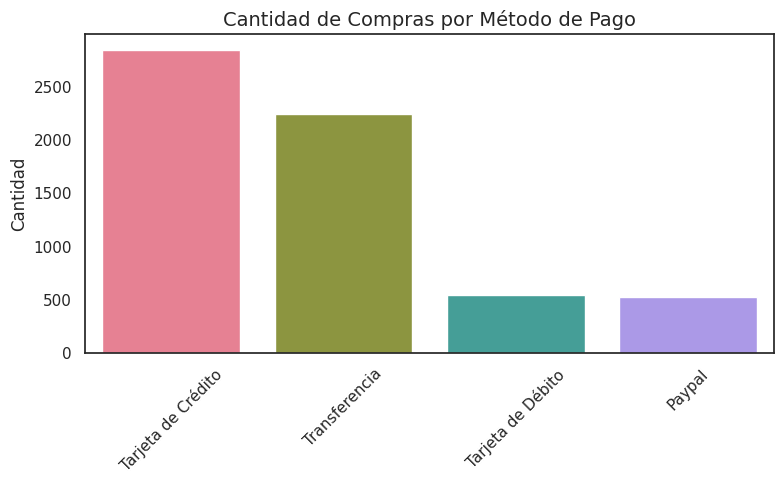

In [27]:
# Visualizaci√≥n
plt.figure(figsize=(8, 5))
sns.barplot(data=metodos_de_pago, x='Metodo de Pago', y='Cantidad', palette='husl')
plt.title('Cantidad de Compras por M√©todo de Pago', fontsize=14)
plt.ylabel('Cantidad')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

Podemos observar que, incluso sin especificar el tipo de gr√°fico, por la forma en que presentamos los datos a ChatGPT, logr√≥ representar con √©xito un visual que muestra la informaci√≥n deseada. Un gr√°fico de barras es realmente ideal para representar las cantidades de una o m√°s categor√≠as de datos.

Iremos ajustando poco a poco los visuales para que se adecuen a nuestro p√∫blico y reflejen la identidad visual de la empresa.


## **2.2 - Comparando los datos**

---

### **2da Pregunta:** ¬øCu√°l fue la facturaci√≥n por categoria em 2023?

**Observaci√≥n:** Para la facturaci√≥n, consideraremos aqu√≠ el producto entre el precio unitario y la cantidad, sumados al costo de env√≠o de cada producto.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de barras horizontales que muestre la facturaci√≥n por categor√≠a de Zoop.

En "df", tenemos las siguientes columnas:
* categoria: categor√≠as de los productos
* precio_unitario: precio de una unidad del producto
* cantidad: cantidad vendida del producto
* envio: costo de env√≠o total de la compra.

Deseamos crear una visualizaci√≥n que muestre la facturaci√≥n de cada categor√≠a, donde la facturaci√≥n se calcula multiplicando el precio unitario por la cantidad y sumando el costo de env√≠o.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


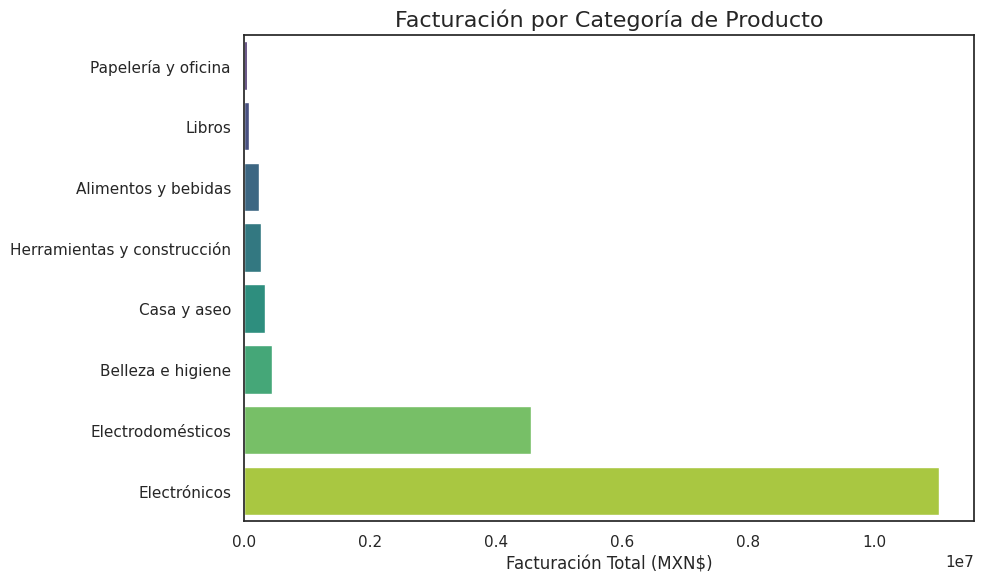

In [28]:
# Crear columna con la facturaci√≥n total por fila
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# Agrupar por categor√≠a y sumar la facturaci√≥n
facturacion_categoria = df.groupby('categoria')['facturacion'].sum().reset_index()
facturacion_categoria = facturacion_categoria.sort_values(by ='facturacion', ascending=True)

# Crear gr√°fico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x='facturacion', y='categoria', data=facturacion_categoria, palette='viridis')
plt.title('Facturaci√≥n por Categor√≠a de Producto', fontsize=16)
plt.xlabel('Facturaci√≥n Total (MXN$)')
plt.ylabel('')
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Aqu√≠ especificamos el tipo de gr√°fico, guiando a ChatGPT en la creaci√≥n de nuestro visual. Podemos notar que en un gr√°fico de barras el enfoque est√° m√°s centrado en las categor√≠as, adem√°s de ser una forma m√°s fluida de leer textos que podr√≠an ser demasiado extensos para un gr√°fico de columnas.


### **3a Pregunta:** ¬øC√≥mo fueron las ventas a lo largo de los meses en 2023?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de l√≠neas que muestre las ventas totales mensuales de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturaci√≥n: calculada como el producto del precio unitario y la cantidad, sumado al costo de env√≠o de cada venta.

Deseamos crear una visualizaci√≥n que muestre las ventas por mes. Primero, agrupa los datos por mes y luego crea una nueva columna llamada "mes" que contenga el nombre de cada mes, traduciendo los meses del √≠ndice mediante el siguiente diccionario. Utiliza la columna "fecha" para agrupar los datos y construir el gr√°fico. La columna "mes" solo debe usarse para cambiar las etiquetas del eje x.

```
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}
```


Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


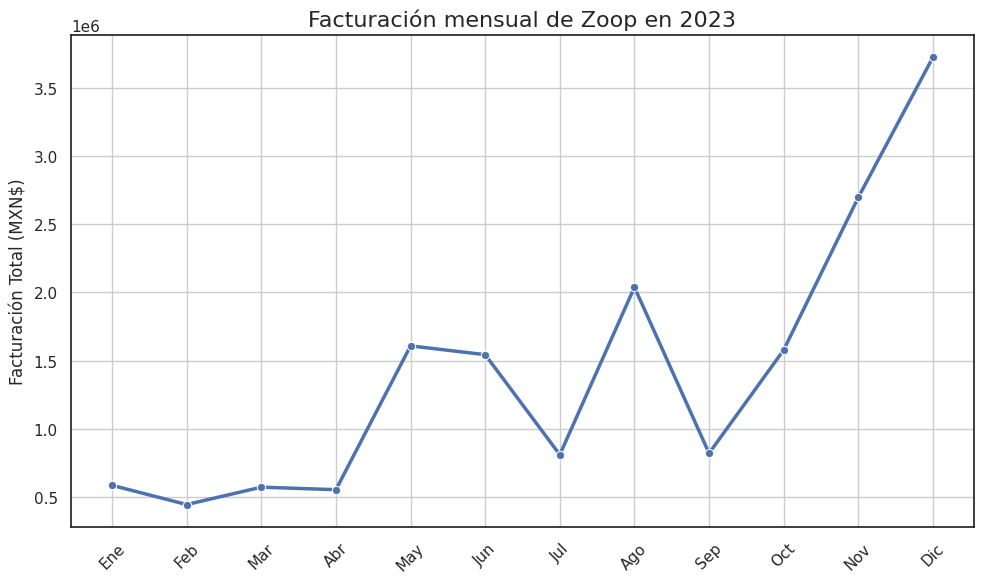

In [29]:
# Diccionario para traducir los nombres de los meses al espa√±ol
meses = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}
# Agrupar por n√∫mero de mes (1 a 12)
ventas_mensuales = df.groupby(df['fecha'].dt.month)['facturacion'].sum()
# Reindexar para asegurar orden cronol√≥gico
ventas_mensuales = ventas_mensuales.sort_index()

# Convertimos los n√∫meros de los meses en una columna.
ventas_mensuales = ventas_mensuales.reset_index()
ventas_mensuales.columns = ['mes', 'facturacion']

# Renombrar los √≠ndices num√©ricos con nombres de meses en espa√±ol
ventas_mensuales['mes'] = ventas_mensuales['mes'].map(meses)

# Crear gr√°fico de l√≠neas
plt.figure(figsize=(10, 6))
sns.lineplot(x='mes', y='facturacion', data=ventas_mensuales, marker='o', linewidth=2.5)
plt.title('Facturaci√≥n mensual de Zoop en 2023', fontsize=16)
plt.xlabel('')
plt.ylabel('Facturaci√≥n Total (MXN$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---
Se us√≥ un diccionario cuyas llaves corresponden al n√∫mero del mes para realizar una m√°s conversi√≥n directa a las etiquetas con abreviaturas. Gracias a lo cual no se necesit√≥ crear columnas adicionales en el df original o convertir muchas veces el tipo de datos de la columna de agrupamiento.

Cuando tenemos una cantidad mayor de per√≠odos en nuestros datos, vale la pena recurrir a gr√°ficos de l√≠neas, que son ideales para series temporales. Dado que nuestros datos son mensuales, utilizar un gr√°fico de columnas, por ejemplo, reducir√≠a la percepci√≥n de la secuencia de los datos. Las l√≠neas ofrecen una mayor sensaci√≥n de continuidad.

Si√©ntete libre de formular algunas hip√≥tesis sobre los momentos de alta y baja en las compras.


##**2.3 - Componiendo datos din√°micos**


Construimos algunos visuales interesantes para comparar los datos, mostrando las facturaciones de Zoop. Ahora, pasemos a una nueva categor√≠a de visuales: composici√≥n.

Vamos a hacer una composici√≥n din√°mica de los datos. Para ello, a√±adiremos m√°s variables al an√°lisis, incorporando 3 variables diferentes, siendo una de ellas categ√≥rica.

###**4a Pregunta:** ¬øC√≥mo est√° dividida la venta por trimestre por m√©todo de pago? ¬øExiste alg√∫n per√≠odo en el que alg√∫n tipo de pago se destaque?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de barras apiladas que muestre las ventas por trimestre en relaci√≥n con el m√©todo de pago de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturacion: con los valores de las ventas
* metodo_pago: con el m√©todo de pago elegido en la compra

Deseamos crear una visualizaci√≥n que muestre las ventas por trimestre, agrupando los m√©todos de pago de cada trimestre correspondientes a cada compra.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


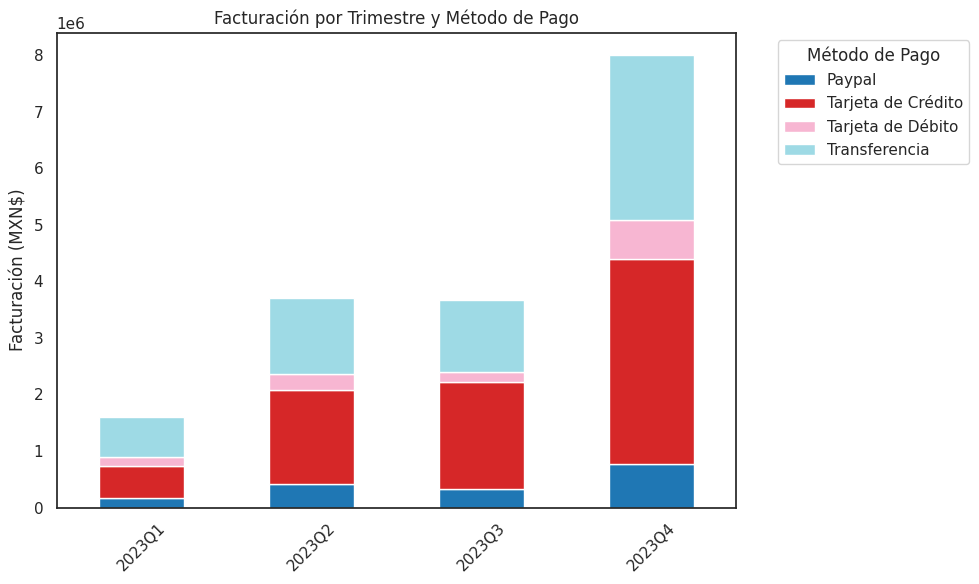

In [30]:
trimestres = {1:'2023Q1', 2:'2023Q2', 3:'2023Q3', 4:'2023Q4'}

# Paso 2: Agrupar por trimestre y m√©todo de pago, sumando la facturaci√≥n
ventas_trimestre = df.groupby([df['fecha'].dt.quarter, 'metodo_pago'])['facturacion'].sum()
ventas_trimestre = ventas_trimestre.unstack() #Se convierte las etiquetas del √∫ltimo indice (m√©todo_pago) en columnas.
ventas_trimestre.reset_index(inplace=True) #Se convierte el √≠ndice restante (fecha) en columna.
ventas_trimestre['fecha']=ventas_trimestre['fecha'].map(trimestres) #Se reemplazan los n√∫meros en la columna 'fecha' por los valores del diccionario "trimestres".
ventas_trimestre = ventas_trimestre.rename(columns={'fecha':'trimestre'}) #Se reenombra el nombre de la columna fecha a trimestre.

# Paso 3: Crear el gr√°fico de barras apiladas
metodos_pago = ['Paypal', 'Tarjeta de Cr√©dito', 'Tarjeta de D√©bito', 'Transferencia'] #Se enlista las columnas que se graficar√°n en el eje Y.
ventas_trimestre.plot(x='trimestre', y=metodos_pago, kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Paso 4: Personalizar el gr√°fico
plt.title('Facturaci√≥n por Trimestre y M√©todo de Pago')
plt.xlabel('')
plt.ylabel('Facturaci√≥n (MXN$)')
plt.xticks(rotation=45)
plt.legend(title='M√©todo de Pago', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

El gr√°fico de columnas apiladas a√±ade a la comparaci√≥n entre per√≠odos o categor√≠as, la comparaci√≥n tambi√©n entre los datos de cada per√≠odo/categor√≠a. Es como si pusi√©ramos una "lupa" en cada columna y visualiz√°ramos la composici√≥n de cada una de acuerdo con la variable deseada (aqu√≠, las formas de pago).

Si√©ntete libre de formular algunas hip√≥tesis sobre las ventas por trimestre combinadas con el tipo de pago y qu√© ideas podemos obtener de esta base de datos.


### **Pregunta adicional:** ¬øCu√°nto es la facturaci√≥n trimestral en las 3 categor√≠as con la menor facturaci√≥n?

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir una visualizaci√≥n de un gr√°fico de columnas agrupadas lado a lado que presente las ventas por trimestre en relaci√≥n con las categor√≠as de los productos.

En "df", tenemos las columnas:

trimestre: con las fechas en trimestres de las compras
faturamento: con los valores de las ventas
categoria: con las categor√≠as de los productos vendidos. Vamos a utilizar solo las categor√≠as "Papeler√≠a y oficina", "Libros" y "Alimentos y bebidas".
Deseamos crear una visualizaci√≥n que presente las ventas por trimestre ("facturacion"), agrupando las categor√≠as lado a lado en relaci√≥n con el trimestre correspondiente a cada compra.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

In [31]:
#Se a√±ade una columna con el trimestre de las ventas.
df['trimestre'] = df['fecha'].dt.to_period('Q')

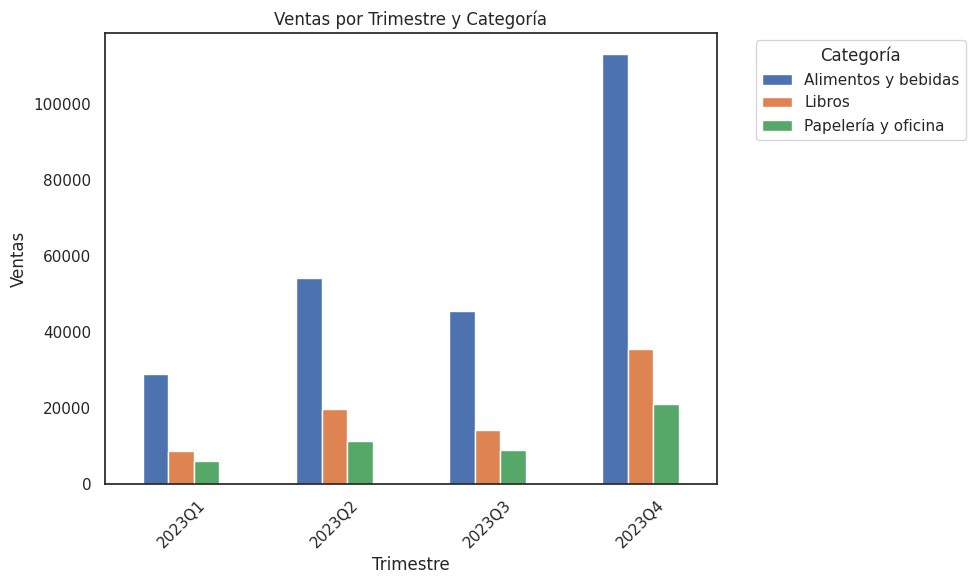

In [32]:
# Filtrar las categor√≠as deseadas con indexaci√≥n booleana.
categorias_deseadas = ["Papeler√≠a y oficina", "Libros", "Alimentos y bebidas"]
df_filtrado = df[df['categoria'].isin(categorias_deseadas)]

# Pivotar los datos para tener los trimestres como √≠ndice y las categor√≠as como columnas
'''
Una alternativa a groupby y unstack
'''
pivot_df = df_filtrado.pivot_table(index='trimestre', columns='categoria', values='facturacion', aggfunc='sum')

# Crear el gr√°fico de columnas agrupadas
pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))
# Agregar etiquetas y t√≠tulo
plt.xlabel('Trimestre')
plt.ylabel('Ventas')
plt.title('Ventas por Trimestre y Categor√≠a')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
# Mostrar el gr√°fico
plt.legend(title='Categor√≠a', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##**2.4 - Desaf√≠o: Generando visualizaciones con respecto a la localizaci√≥n**
Has recibido una nueva demanda de Zoop para generar 2 nuevos visuales, uno relacionado con el perfil de las ventas y el otro con el perfil de los clientes de una regi√≥n espec√≠fica. Vamos a observar las dos situaciones y construir, con la ayuda de ChatGPT, los dos gr√°ficos solicitados:

***Desaf√≠o 1:***

Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre el facturaci√≥n de las ventas por regi√≥n. Recuerda que aqu√≠ la facturaci√≥n se calcula multiplicando el valor unitario por la cantidad comprada y sumando el costo de env√≠o.

***Desaf√≠o 2:***

Zoop quiere realizar una campa√±a en los estados de M√©xico y Puebla, por lo que necesita conocer el perfil de su p√∫blico seg√∫n el sexo biol√≥gico. Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre la composici√≥n del p√∫blico por sexo biol√≥gico en los estados de M√©xico y Puebla. Recuerda pedir que agrupe o apile los datos para la presentaci√≥n.

###**Desaf√≠o 1:**

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df_desafio" y queremos construir una visualizaci√≥n de gr√°fico de columnas que presente la facturaci√≥n por regi√≥n de Zoop.
En "df_desafio", tenemos las siguientes columnas:
- region: regi√≥n del/de la cliente
- facturacion: ingreso generado en una compra

Deseamos crear una visualizaci√≥n que presente la facturaci√≥n de cada regi√≥n. Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

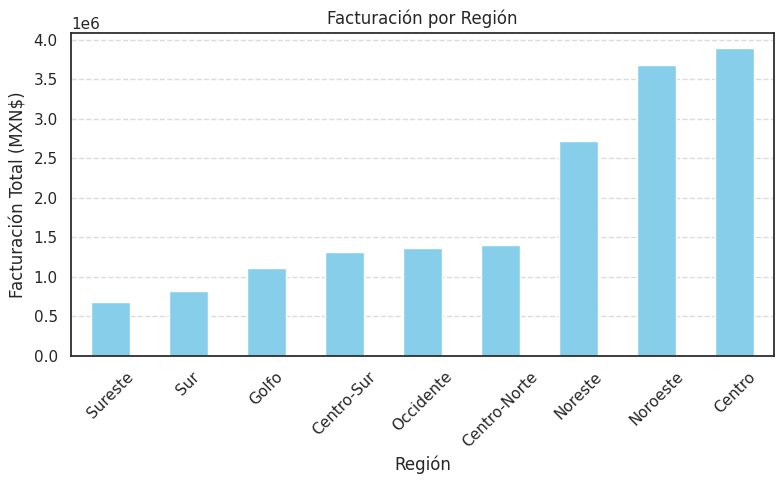

In [33]:
# Agrupar por regi√≥n y sumar la facturaci√≥n
df_desafio['facturacion'] = (df_desafio['precio_unitario'] * df_desafio['cantidad']) + df_desafio['envio']
facturacion_region = df_desafio.groupby('region')['facturacion'].sum().sort_values()

# Crear gr√°fico de columnas
facturacion_region.plot(kind='bar', color='skyblue', figsize=(8, 5))

# Personalizaci√≥n
plt.title('Facturaci√≥n por Regi√≥n')
plt.xlabel('Regi√≥n')
plt.ylabel('Facturaci√≥n Total (MXN$)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) #alpha establece la transparencia del grid.
plt.tight_layout()
plt.show()

###**Desaf√≠o 2:**

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df_desafio" y queremos construir un gr√°fico de columnas apiladas que presente la cantidad de personas por sexo biol√≥gico en relaci√≥n con los estados de "M√©xico" y "Puebla".

En "df_desafio", tenemos las siguientes columnas:

- estado: estado del/de la cliente. Utilizaremos √∫nicamente los estados de "M√©xico" y "Puebla"
- sexo_biologico: sexo biol√≥gico del/de la cliente

Deseamos crear una visualizaci√≥n que presente la cantidad de personas agrupadas por sexo biol√≥gico en los estados que definimos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

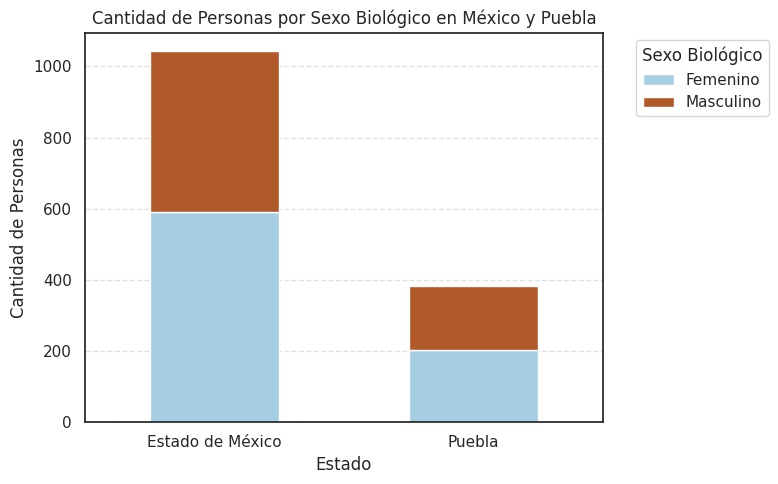

In [34]:
# Filtrar los estados requeridos
df_filtrado = df_desafio[df_desafio['estado'].isin(['Estado de M√©xico', 'Puebla'])]

# Agrupar por estado y sexo biol√≥gico, y contar
conteo = df_filtrado.groupby(['estado', 'sexo_biologico']).size().unstack(fill_value=0)

# Crear gr√°fico de columnas apiladas
conteo.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')

# Personalizaci√≥n
plt.title('Cantidad de Personas por Sexo Biol√≥gico en M√©xico y Puebla')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=0)
plt.legend(title='Sexo Biol√≥gico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **Clase 3 - Generando m√°s visualizaciones**

## **3.1 - Componiendo datos est√°ticos**

---

Inicialmente, presentaremos un ejemplo de c√≥mo podemos utilizar la comparaci√≥n de datos est√°ticos, es decir, un recorte en el tiempo o de las variables que poseemos.

### **5¬™ Pregunta:** ¬øCu√°l es la proporci√≥n de la clientela que participa en nuestro programa de cashback?

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la proporci√≥n de usuarios(as) que est√°n participando en el programa de cashback de Zoop.

En "df", tenemos la columna "cashback" que contiene estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


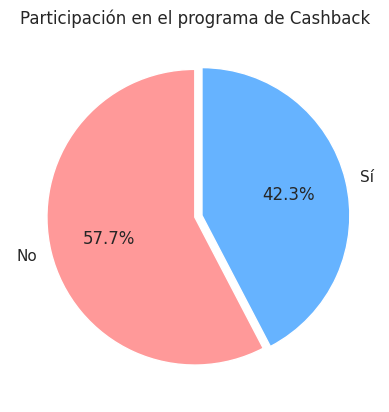

In [35]:
# Contar cu√°ntos participan y cu√°ntos no
cashback_counts = df['cashback'].value_counts()

# Crear gr√°fico de pastel
fig, ax = plt.subplots()
ax.pie(
    cashback_counts,
    labels=cashback_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff'],  # Colores
    explode=[0.05 if label == 'S√≠' else 0 for label in cashback_counts.index],  # Resaltar "S√≠" si deseas
    wedgeprops={'width': 1} #Se grafica un pastel completo.
)

ax.set_title('Participaci√≥n en el programa de Cashback')
ax.set_aspect('equal')  # Para que el gr√°fico sea circular

plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬øPodr√≠as utilizar el color rojo y mantener el azul y cambiar el gr√°fico anterior a uno tipo rosquilla?

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


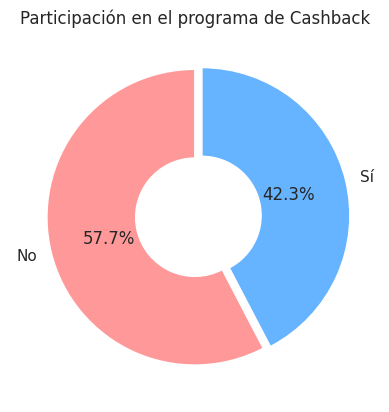

In [36]:
# Contar cu√°ntos participan y cu√°ntos no
cashback_counts = df['cashback'].value_counts()

# Crear gr√°fico de pastel
fig, ax = plt.subplots()

'''
El circulo interior tiene un radio de R - 40%R. Siendo R el radio desde el
centro hasta los bordes de las secciones
'''
ax.pie(
    cashback_counts,
    labels=cashback_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff'],  # Colores
    explode=[0.05 if label == 'S√≠' else 0 for label in cashback_counts.index],  # Resaltar "S√≠" si deseas
    wedgeprops={'width': 0.6} #Se grafica un anillo.
)

ax.set_title('Participaci√≥n en el programa de Cashback')
ax.set_aspect('equal')  # Para que el gr√°fico sea circular

plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

¬°Mira eso! Una vez m√°s, la IA nos present√≥ una buena idea de qu√© gr√°fico aplicar para este caso, pero ¬ønotaste que "ella" no tiene idea de los datos que poseemos?

Debemos estar atentos a esto, ya que solo le proporcionamos los nombres de las columnas y los datos que hab√≠a all√≠. La IA no puede saber si un valor es positivo o negativo, por ejemplo. Por eso, el "no" estaba en azul y el "s√≠" en verde. En el siguiente prompt, le indicamos que sustituyera el color verde por el rojo (sin mencionar el valor real de los datos) y pedimos una modificaci√≥n en el visual.

¬øQu√© tal si experimentas hacer otros pedidos y ves c√≥mo se comporta ChatGPT?

Hablando del gr√°fico, los gr√°ficos de sectores son ideales para pocas categor√≠as de datos, preferiblemente datos dicot√≥micos (2 categor√≠as, como s√≠ y no, gato y perro...). Representan la proporci√≥n de los datos de manera est√°tica.

## **3.2 - Distribuyendo Datos**

---


Con la ayuda de la IA, generaremos m√°s gr√°ficos que ser√°n importantes para la construcci√≥n del storytelling del informe de Zoop, seg√∫n lo solicitado. Ahora, partiendo de la distribuci√≥n de datos, vamos a analizar el perfil de los clientes y c√≥mo eval√∫an sus compras en Zoop.

### **6¬™ Pregunta:** ¬øC√≥mo est√°n distribuidas las calificaciones de la compra? ¬øTenemos buenos n√∫meros en general?  


Vamos a pedirle a ChatGPT que nos ayude a construir este visual. Veamos si esta IA puede representar estos datos con un visual adecuado.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la distribuci√≥n de las evaluaciones del p√∫blico en relaci√≥n con las compras realizadas en la tienda online.

En "df", tenemos la columna "nota" con las calificaciones otorgadas por cada usuario en relaci√≥n con la compra que realizaron, que var√≠an de 0 a 10 en n√∫meros enteros.

Deseamos crear una visualizaci√≥n que muestre la distribuci√≥n de estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear este gr√°fico.


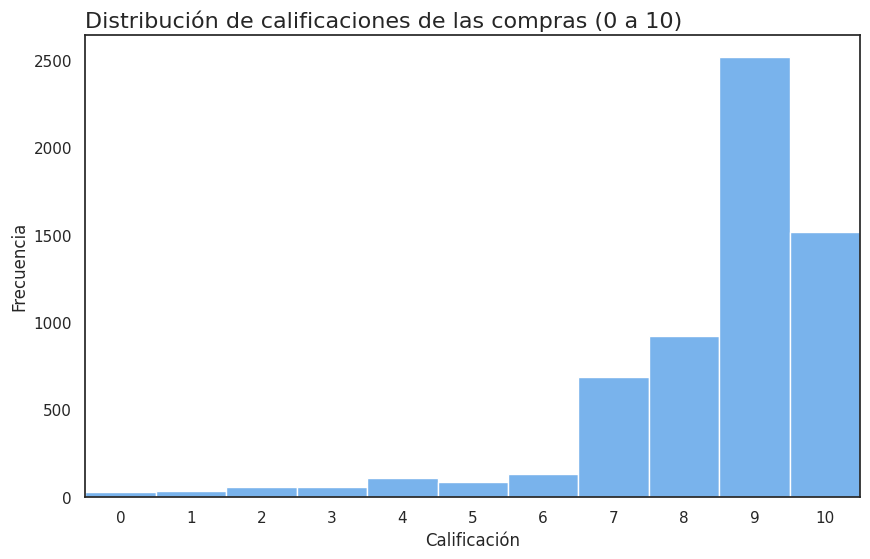

In [37]:
# Contar cu√°ntos participan y cu√°ntos no
nota_counts = df['nota'].value_counts()

# Crear figura
plt.figure(figsize=(10, 6))

# Histograma de la columna "nota"
sns.barplot(x=nota_counts.index,
            y=nota_counts.values,
            color='#66b3ff',
            width=1 #Para agrandar las barras y colocarlas juntas
            )

# Personalizar el gr√°fico
plt.title('Distribuci√≥n de calificaciones de las compras (0 a 10)', fontsize=16, loc='left')
plt.xlabel('Calificaci√≥n')
plt.ylabel('Frecuencia')

# Mostrar gr√°fico
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Tras no especificar directamente el tipo de gr√°fico, ChatGPT proporcion√≥ el c√≥digo para un histograma de columnas. Aunque este gr√°fico es ideal para presentar la distribuci√≥n de una variable num√©ricas con escala continua, decid√≠ reemplazarlo por un gr√°fico de barras donde cada columna representa la frecuencia de repetici√≥n de un valor. Estos valores al estar en una escala discreta se visualizan mejor en un gr√°fico de barras que en un histograma.

¬øPasar√° lo mismo solo con las edades? No. Aunque tambi√©n emplean una escala discreta, al tener m√°s valores, es mejor agruparlos por rangos para simplificar su interpretaci√≥n.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la distribuci√≥n de las edades del p√∫blico en relaci√≥n con las compras realizadas en la tienda online.

En "df", tenemos la columna "edad" con las edades de cada usuario que realiz√≥ una compra, que var√≠an de 18 a 70 en n√∫meros enteros y tiene 53 valores √∫nicos.

Deseamos crear una visualizaci√≥n que muestre la distribuci√≥n de estos datos. Agrupando las edades en intervalos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear este gr√°fico.

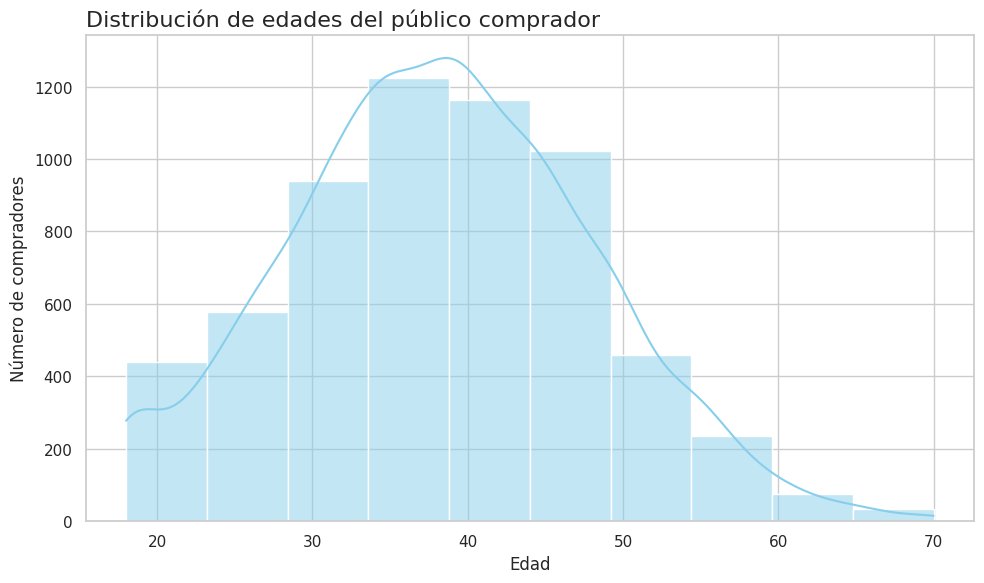

In [38]:
# Configurar el estilo del gr√°fico
sns.set(style="whitegrid")

# Crear la figura
plt.figure(figsize=(10, 6))

# Crear histograma de edades con agrupaci√≥n autom√°tica (bins)
sns.histplot(data=df, x='edad', bins=10, color='skyblue', kde=True)

# Personalizar el gr√°fico
plt.title('Distribuci√≥n de edades del p√∫blico comprador', fontsize=16, loc='left')
plt.xlabel('Edad')
plt.ylabel('N√∫mero de compradores')

plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Al emplear **hisplot** de Seaborn **no se requiere crear una serie o dataframe con la frecuencia de la variable** a representar en el eje X. Solo se debe especificar la cantidad de intervalos con el par√°metro **`bins`**.

### **7¬™ Pregunta:** ¬øC√≥mo est√° distribuida nuestra audiencia por edad y sexo biol√≥gico? ¬øExiste alg√∫n grupo que sobresalga?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la distribuci√≥n de nuestra audiencia por edad y sexo biol√≥gico.

En "df", tenemos las columnas:
* edad: edad de la persona que realiz√≥ la compra
* sexo_biologico: sexo biol√≥gico de la persona que realiz√≥ la compra, con datos categ√≥ricos

Deseamos crear una visualizaci√≥n que muestre la distribuci√≥n de estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [39]:
# Configurar el estilo del gr√°fico
sns.set(style="white")

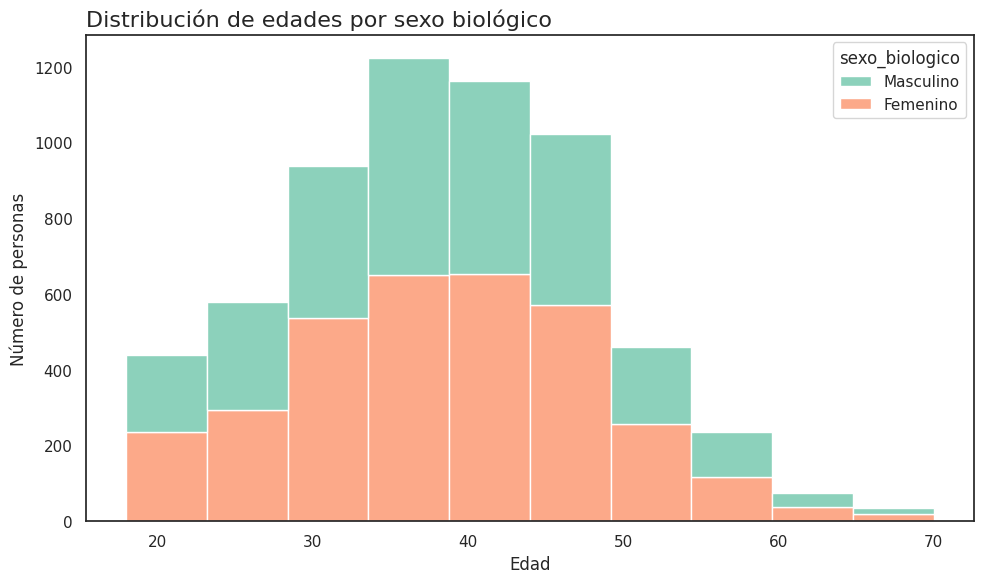

In [40]:
# Crear la figura
plt.figure(figsize=(10, 6))

# Histograma con barras agrupadas por sexo
sns.histplot(
    data=df,
    x='edad',
    hue='sexo_biologico',
    bins=10,
    multiple='stack',
    palette='Set2'
)

# Personalizar el gr√°fico
plt.title('Distribuci√≥n de edades por sexo biol√≥gico', fontsize=16, loc='left')
plt.xlabel('Edad')
plt.ylabel('N√∫mero de personas')
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---
El gr√°fico generado es poco pr√°ctico, ya que compila los datos del sexo biol√≥gico 'Masculino' y 'Femenino' en barras apiladas. Necesitamos darle una instrucci√≥n adicional a GPT para elegir un visual m√°s adecuado.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Creo que podemos mejorar este gr√°fico. ¬øQu√© te parece cambiar a un boxplot?


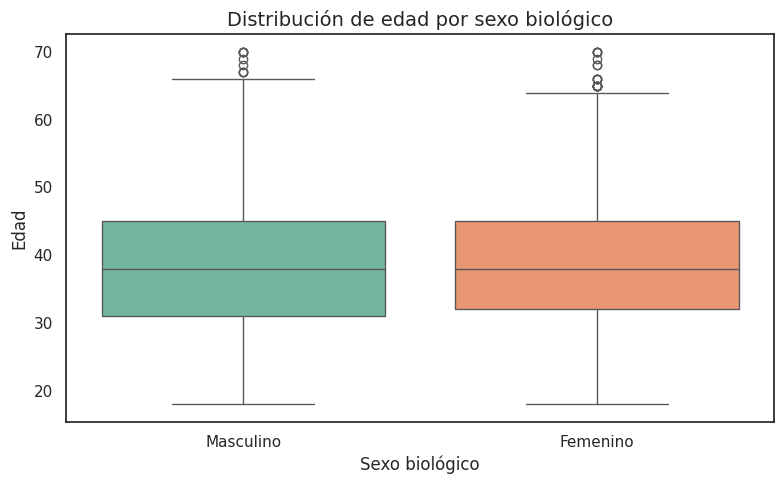

In [41]:
# Crear el gr√°fico
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sexo_biologico', y='edad', palette='Set2')

# Personalizar
plt.title('Distribuci√≥n de edad por sexo biol√≥gico', fontsize=14)
plt.xlabel('Sexo biol√≥gico')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Esta vez fue necesario guiar a la IA para generar una visualizaci√≥n mejor para nuestros an√°lisis.

El gr√°fico representado es un boxplot (diagrama de caja) que es ideal para representar un conjunto de datos de acuerdo con 5 medidas de inter√©s: valor m√°ximo, m√≠nimo, 1¬∫ cuartil (donde est√°n situados el 25% de los datos), 2¬∫ cuartil o mediana (donde est√°n situados el 50% de los datos) y 3¬∫ cuartil (donde est√°n situados el 75% de los datos).

¬øRecuerdas el `describe()`? Este gr√°fico presenta en un solo elemento gran parte de los datos que la funci√≥n muestra en tabla.

Concluimos la 1¬™ versi√≥n de los 7 visuales que utilizaremos en nuestro proyecto. Ahora, pasaremos a la aplicaci√≥n de las t√©cnicas de storytelling para mejorar los visuales y adaptarlos a la identidad visual de Zoop antes de la exportaci√≥n.


##**3.3 - Desaf√≠o: Perfil de los clientes**
Has recibido una nueva solicitud de Zoop para generar 2 visuales, siendo uno de ellos relacionado al registro de clientes para un nuevo servicio que Zoop implementar√°, el Zoop Pay, y el otro sobre las evaluaciones de los clientes en relaci√≥n con su ubicaci√≥n.

***Desaf√≠o 1:***
Zoop est√° en proceso de lanzamiento de su billetera digital, que brindar√° acceso a una serie de beneficios para sus clientes, y le gustar√≠a saber cu√°l es el porcentaje de personas que ya est√°n pre-registradas para este producto. El e-commerce busca comprender este n√∫mero para definir la necesidad de promoci√≥n y esfuerzo para atraer m√°s clientes a esta funcionalidad.

Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que presente la proporci√≥n de personas pre-registradas en Zoop Pay.

***Desaf√≠o 2:***
Zoop quiere analizar la distribuci√≥n de las edades de los clientes por regi√≥n con el fin de delinear una "persona" (perfil) de su clientela en diferentes localidades del pa√≠s, y para ello, solicit√≥ un visual que distribuya estos datos. Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre la distribuci√≥n de las edades de los clientes por regi√≥n.

### **Desafio 1:**
> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df_desafio" y queremos construir una visualizaci√≥n que presente la proporci√≥n de los(as) usuarios(as) que realizaron el pre-registro en Zoop Pay, la nueva soluci√≥n de Zoop.

En "df_desafio", tenemos la columna "zoop_pay" que contiene estos datos. Construye un gr√°fico de dona donde el valor "S√≠" reciba un color verde menta oscuro y "No" el color gris.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

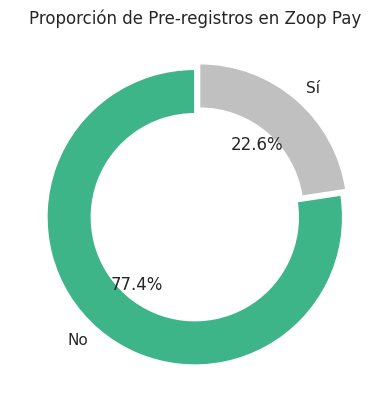

In [42]:
# Contar la cantidad de registros por valor en 'zoop_pay'
zoop_counts = df_desafio['zoop_pay'].value_counts()

# Colores personalizados
colors = ['#3EB489', '#C0C0C0']  # Verde menta oscuro, Gris
labels = zoop_counts.index

# Crear el gr√°fico de dona
fig, ax = plt.subplots()
ax.pie(
    zoop_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=[0.05 if label == 'S√≠' else 0 for label in labels],
    wedgeprops={'width': 0.3}  # Hace la dona
)

# T√≠tulo
ax.set_title('Proporci√≥n de Pre-registros en Zoop Pay')
plt.show()

### **Desafio 2:**
> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df_desafio" y queremos construir una visualizaci√≥n que muestre la distribuci√≥n de las edades de los(as) clientes por regi√≥n.

En "df_desafio", tenemos las siguientes columnas:

region: regi√≥n de la persona que realiz√≥ la compra.

edad: edad de la persona que realiz√≥ la compra.

Deseamos crear una visualizaci√≥n de boxplot que presente la distribuci√≥n de estos datos. Coloca las edades en el eje x y las regiones en el eje y.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

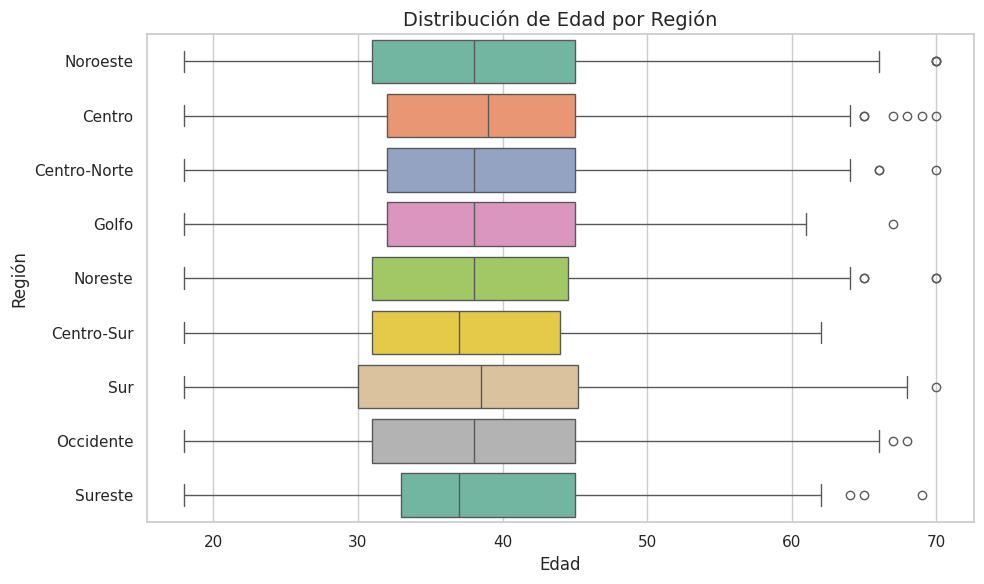

In [43]:
# Estilo opcional
sns.set(style="whitegrid")

# Crear la figura
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(
    data=df_desafio,
    x='edad',
    y='region',
    palette='Set2'
)

# T√≠tulos y etiquetas
plt.title('Distribuci√≥n de Edad por Regi√≥n', fontsize=14)
plt.xlabel('Edad')
plt.ylabel('Regi√≥n')

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()

# **Clase 4 - T√©cnicas de storytelling**

## **4.1 - Definiendo los colores del proyecto**

---


Ahora, vamos a explorar la importancia de los colores en la visualizaci√≥n de datos, discutir c√≥mo las personas perciben e interpretan la informaci√≥n visual, y abordar la diferencia entre la capacidad de la inteligencia artificial y la visi√≥n humana en lo que respecta a la elecci√≥n de colores y accesibilidad.



### Paleta de colores de Zoop:

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/zoop_paleta_cores.png" alt="inserir alt" width=480>

&nbsp;

#### Paleta del proyecto

|Rojo|||
|------|------|------|
| Rojo_1 |Rojo_2 |Rojo_3 |
|#e23155 | #cc2c4e| #b32742 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_3.png) |

&nbsp;

|Azul|||
|------|------|------|
| AZUL_1 |AZUL_2 |AZUL_3 |
|#203f75 | #1c3867| #19325b |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_3.png) |

&nbsp;

|Gris||||||
|------|------|------|------|------|------|
|BLANCO| GRIS_1 |GRIS_2 |GRIS_3 |GRIS_4 |GRIS_5 |
|#ffffff | #ebebeb | #d9d9d9| #cccccc | #555655| #231f20 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/BRANCO.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_1.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_3.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_4.png)|![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_5.png)|

&nbsp;

|Aqua|||
|------|------|------|
| AQUA_1 |AQUA_2 |AQUA_3 |
|#addcd4 | #9fccc5| #96bfb9 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_3.png) |

&nbsp;


In [44]:
# Adicionamos los colores al proyecto
ROJO_1,	ROJO_2,	ROJO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BLANCO,GRIS_1, GRIS_2, GRIS_3, GRIS_4,	GRIS_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

<font size=5> ***¬øPor qu√© definimos nosotros mismos los colores del proyecto?*** </font>


1. **Percepci√≥n humana de los colores:**

Nuestro cerebro interpreta los colores de manera √∫nica, asociando emociones y significados a cada tonalidad. Es importante, al elegir los colores para representar datos, considerar la percepci√≥n humana para asegurar que la informaci√≥n se transmita de manera clara y eficaz. Adem√°s de seguir la identidad visual de Zoop, es decir, dar esa sensaci√≥n de que el visual es de Zoop.

2. **Accesibilidad:**

Ciertas combinaciones de colores pueden ser dif√≠ciles de percibir para personas con deficiencias visuales. Nuestra responsabilidad como desarrolladores es garantizar que nuestras visualizaciones sean inclusivas. Aqu√≠ seguiremos algunas directrices y recomendaciones para crear gr√°ficos accesibles.

3. **IA vs. elecci√≥n de colores:**

Mientras que la IA puede realizar tareas complejas, como an√°lisis de datos y reconocimiento de patrones, a√∫n no posee el discernimiento humano cuando se trata de elegir colores significativos y garantizar la accesibilidad. Aqu√≠ es donde entra nuestra intervenci√≥n creativa y consideraci√≥n humana.

4. **Experiencia visual:**

¬øLas personas pueden entender la informaci√≥n transmitida por los gr√°ficos? ¬øExiste alg√∫n "conflicto" entre los colores que perjudica la claridad del mensaje? Vamos a explorar t√©cnicas para mejorar la experiencia visual, como el contraste adecuado, la elecci√≥n cuidadosa de los colores de la paleta y el destaque de elementos clave.

¬øVamos ahora a sumergirnos en la pr√°ctica e incorporar estos conceptos a nuestro proyecto?


## **4.2 - A√±adiendo etiquetas y r√≥tulos**

Ya hemos creado anteriormente los 7 visuales y definido los colores del proyecto. Ahora, vamos a elegir solo uno de los visuales para comprender c√≥mo podemos utilizar la IA para agregar los colores ideales, las etiquetas de los datos, t√≠tulos y etiquetas de los ejes.

Entonces, tomaremos el c√≥digo de ese primer gr√°fico (M√©todos de pago utilizados) y exploraremos estos cambios a trav√©s de la utilizaci√≥n de la IA.

In [45]:
# Crear tabla resumen con la cantidad de cada m√©todo de pago
metodos_de_pago = df['metodo_pago'].value_counts().reset_index() #Se resetea la columna 'metodo_pago', que era el √≠ndice.
metodos_de_pago.columns = ['Metodo de Pago', 'Cantidad'] #Establecemos los nombres de las columnas.

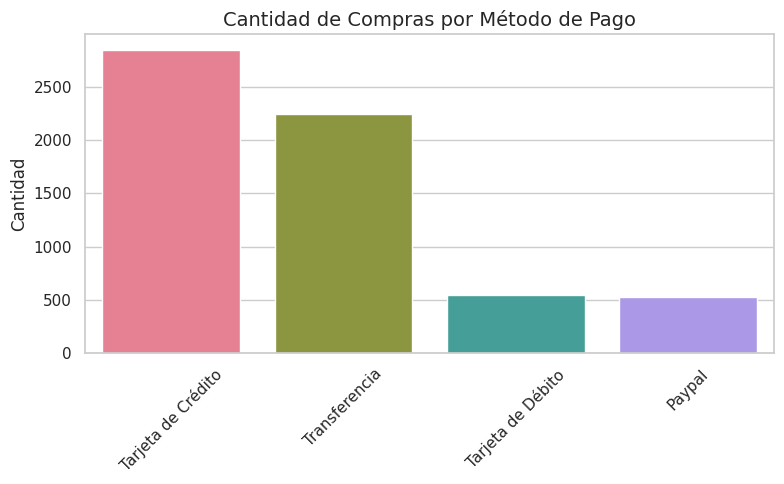

In [46]:
# Visualizaci√≥n
plt.figure(figsize=(8, 5))
sns.barplot(data=metodos_de_pago, x='Metodo de Pago', y='Cantidad', palette='husl')
plt.title('Cantidad de Compras por M√©todo de Pago', fontsize=14)
plt.ylabel('Cantidad')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora lleg√≥ el momento de refinar nuestras visualizaciones. Comencemos con el primer gr√°fico que hicimos, el de los m√©todos de pago.

Nuestro gr√°fico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, las columnas en el color ROJO_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "M√©todos de pago m√°s utilizados en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben ser suprimidas as√≠ como la etiqueta del eje y (ylabel) y las etiquetas, y la etiqueta del eje x (xticks y xlabel) deben tener tama√±o 12 con el color AZUL_1. Los bordes superior, derecho e izquierdo del gr√°fico deben ser suprimidos.

Adem√°s, es necesario mostrar el total de cada m√©todo de pago encima de cada columna, con el texto tambi√©n en el color AZUL_1 y tama√±o 12.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n. Recuerda que las variables de los colores que estamos utilizando tienen valores de colores ya en hexadecimal.

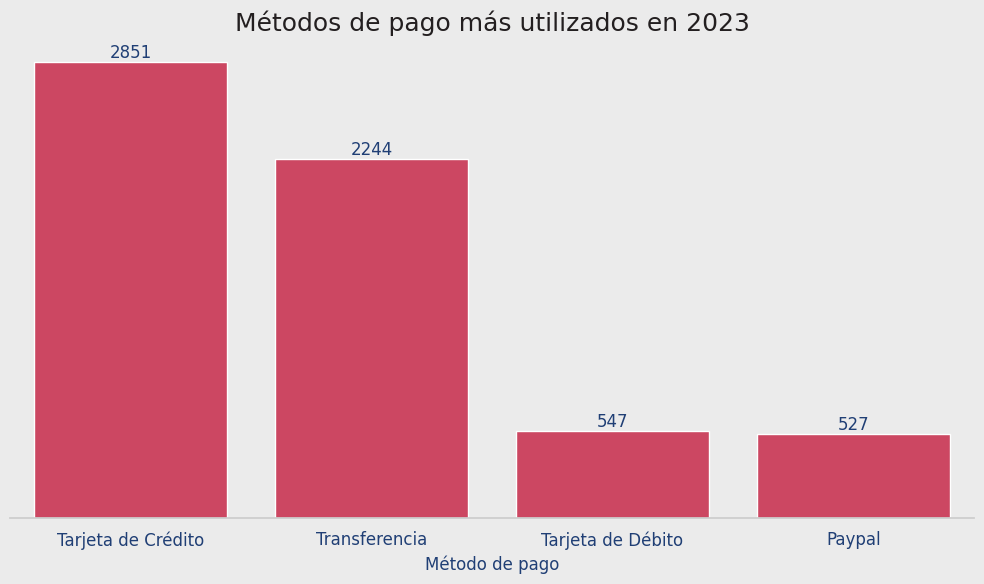

In [47]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(GRIS_1)  # Fondo de la figura
ax.set_facecolor(GRIS_1)         # Fondo del gr√°fico

# Crear gr√°fico de barras
sns.barplot(data=metodos_de_pago, x='Metodo de Pago', y='Cantidad', ax=ax, color=ROJO_1)

# T√≠tulo del gr√°fico
ax.set_title("M√©todos de pago m√°s utilizados en 2023", fontsize=18, color=GRIS_5)

# Etiquetas del eje X
ax.set_xlabel("M√©todo de pago", fontsize=12, color=AZUL_1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, color=AZUL_1)

# Ocultar eje Y y etiquetas
ax.set_ylabel("")
ax.set_yticks([])

# Eliminar bordes superior, derecho e izquierdo
sns.despine(left=True, right=True, top=True)

# Agregar etiquetas de cantidad encima de cada barra
for m,c in zip(metodos_de_pago['Metodo de Pago'],metodos_de_pago['Cantidad']):
  ax.text(
      m,
      c + 0.2,
      str(c),
      ha='center',
      va='bottom',
      fontsize=12,
      color=AZUL_1
  )

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---
¬°Vaya! Parece otro gr√°fico, ¬øverdad?

Eliminamos muchos elementos distractores y a√±adimos solo la informaci√≥n que nos interesaba. Adem√°s, cambiamos el dise√±o de un estado gen√©rico a un formato que se ajusta a la identidad de Zoop, dejando nuestro gr√°fico listo para ser utilizado, por ejemplo, en el informe de ventas.

M√°s adelante aplicaremos estas acciones a los otros visuales. Nuestro enfoque aqu√≠ es entender las t√©cnicas de storytelling y c√≥mo combinarlas con la IA puede ser bastante √∫til.


## **4.3 - A√±adiendo textos**

---


Ya hemos refinado uno de los gr√°ficos en la etapa anterior. Ahora, vamos a traer ese gr√°fico, a√±adiendo un elemento m√°s que puede ser importante para los an√°lisis: textos informativos. Utilizaremos la IA nuevamente para este proceso.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬°El gr√°fico qued√≥ muy bien!

Ahora quiero a√±adir un texto dentro del √°rea del gr√°fico, ¬øvamos all√°?

Para ello, suma los valores de las dos primeras columnas, divide por la suma de todas las columnas y convierte a formato de porcentaje, almacenando en la variable "porcentaje".

Ahora, en la posici√≥n x=1.5 y y=2500, a√±ade el siguiente texto con tama√±o 10 y color AZUL_3:

`f"$\\bf {porcentaje:.2f}$% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \npara el pago. Ser√≠a interesante considerar asociaciones con \nbancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \na nuestra clientela."`.

In [48]:
#Ordenamos los valores en orden descendente.
metodos_de_pago.sort_values(by='Cantidad', ascending=False, inplace=True)

In [49]:
# Calcular el porcentaje de las dos primeras categor√≠as
porcentaje = ((metodos_de_pago['Cantidad'].iloc[0] + metodos_de_pago['Cantidad'].iloc[1]) / metodos_de_pago['Cantidad'].sum()) * 100

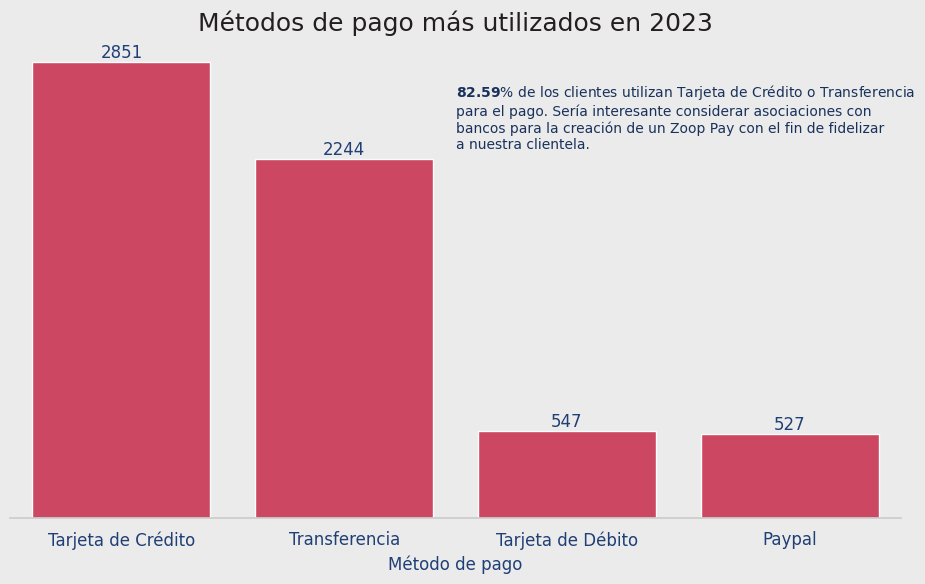

In [50]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(GRIS_1)  # Fondo de la figura
ax.set_facecolor(GRIS_1)         # Fondo del gr√°fico

# Crear gr√°fico de barras
sns.barplot(data=metodos_de_pago, x='Metodo de Pago', y='Cantidad', ax=ax, color=ROJO_1)

# T√≠tulo del gr√°fico
ax.set_title("M√©todos de pago m√°s utilizados en 2023", fontsize=18, color=GRIS_5)

# Etiquetas del eje X
ax.set_xlabel("M√©todo de pago", fontsize=12, color=AZUL_1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, color=AZUL_1)

# Ocultar eje Y y etiquetas
ax.set_ylabel("")
ax.set_yticks([])

# Eliminar bordes superior, derecho e izquierdo
sns.despine(left=True, right=True, top=True)

# Agregar etiquetas de cantidad encima de cada barra
for m,c in zip(metodos_de_pago['Metodo de Pago'],metodos_de_pago['Cantidad']):
  ax.text(
      m,
      c + 0.2,
      str(c),
      ha='center',
      va='bottom',
      fontsize=12,
      color=AZUL_1
  )

# A√±adir el texto dentro del √°rea del gr√°fico
ax.text(
    x=1.5,
    y=2500,
    s=(f"$\\bf{{{porcentaje:.2f}}}$% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \n"
       f"para el pago. Ser√≠a interesante considerar asociaciones con \n"
       f"bancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \n"
       f"a nuestra clientela."),
    fontsize=10,
    color=AZUL_3,
    ha='left',
    va='center'
)

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Aprovechamos el √°rea √∫til para presentar una *idea* que tuvimos al describir los datos de los m√©todos de pago. Esto aumenta significativamente la relevancia de los datos representados y proporciona m√°s informaci√≥n a quien lo lee.


## **4.4 - Agregar elementos visuales**

---


¬øQu√© tal el uso de textos informativos, verdad? ¬øY si ahora a√±adimos otros elementos visuales a uno de nuestros gr√°ficos?

Vamos a elegir ahora el gr√°fico de l√≠neas (Ventas totales mensuales de Zoop) y aplicar una t√©cnica m√°s a √©l mediante el uso de la IA.


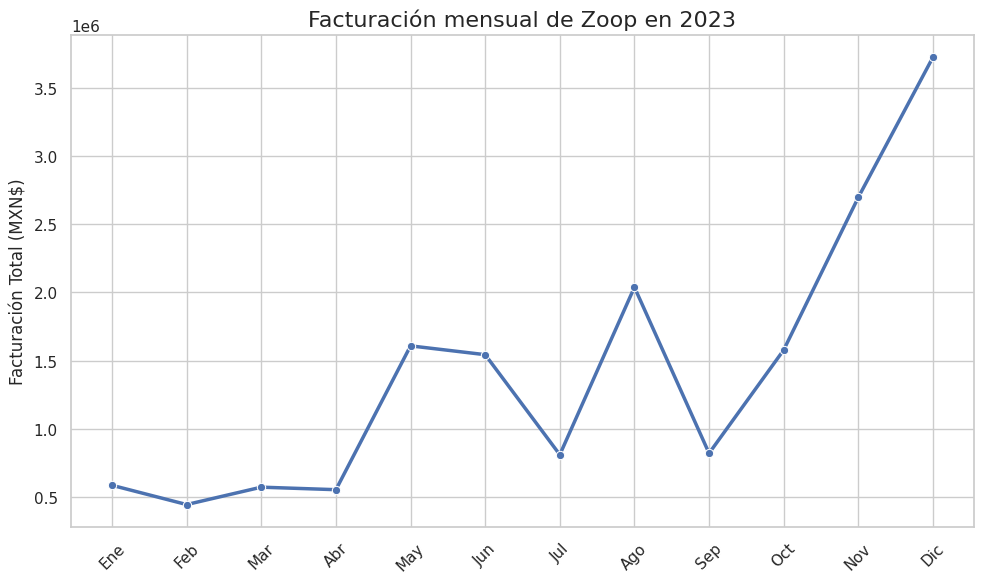

In [51]:
# Diccionario para traducir los nombres de los meses al espa√±ol
meses = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}
# Agrupar por n√∫mero de mes (1 a 12)
ventas_mensuales = df.groupby(df['fecha'].dt.month)['facturacion'].sum()
# Reindexar para asegurar orden cronol√≥gico
ventas_mensuales = ventas_mensuales.sort_index()

# Convertimos los n√∫meros de los meses en una columna.
ventas_mensuales = ventas_mensuales.reset_index()
ventas_mensuales.columns = ['mes', 'facturacion']

# Renombrar los √≠ndices num√©ricos con nombres de meses en espa√±ol
ventas_mensuales['mes'] = ventas_mensuales['mes'].map(meses)

# Crear gr√°fico de l√≠neas
plt.figure(figsize=(10, 6))
sns.lineplot(x='mes', y='facturacion', data=ventas_mensuales, marker='o', linewidth=2.5)
plt.title('Facturaci√≥n mensual de Zoop en 2023', fontsize=16)
plt.xlabel('')
plt.ylabel('Facturaci√≥n Total (MXN$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬øVamos a explorar otro de los gr√°ficos que hicimos? Ahora vamos a utilizar el de Ventas totales mensuales de Zoop. La variable que pasa los valores mensuales es:
```
ventas_mensuales = df.groupby(df['fecha'].dt.to_period('M'))['facturacion'].sum().reset_index()
```
Pero debes sustituirla por:
```
df['mes'] = df['fecha'].dt.strftime('%B')
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
```
En el que `df['fecha']` corresponde a las fechas en formato datetime y `df['facturacion']` a los valores de las ventas.

Y lo que gener√≥ el gr√°fico original fue:

```
sns.lineplot(x='mes', y='facturacion', data=ventas_mensuales, marker='o', sort=False)
```
Pero debes utilizar √∫nicamente la biblioteca matplotlib con la creaci√≥n del gr√°fico siguiendo este ejemplo:

```
plt.plot(ventas_mensuales.index, ventas_mensuales, marker='o', color='#1890FF', linewidth=2)
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en color GRIS_1, la l√≠nea en color AZUL_1 y el tama√±o de la figura debe ser de (12, 6).

El t√≠tulo de la figura es "Ventas totales mensuales en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben estar en el formato "MXN$ valor M" con dos decimales, tama√±o 12 y color AZUL_1.

Las etiquetas del eje X (xticks) deben tener tama√±o 12 con color AZUL_1. Los labels de los ejes x e y (xlabel e ylabel) deben ser suprimidos. Los bordes del gr√°fico en la parte superior y el lado derecho deben ser suprimidos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n. Recuerda que las variables de colores que estamos utilizando tienen valores de colores ya en hexadecimal.


In [52]:
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

In [53]:
# Crear columna con el nombre del mes y agrupar
df['mes'] = df['fecha'].dt.strftime('%B')
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
# Traducir el √≠ndice al espa√±ol para mostrarlo en el eje x
ventas_mensuales.index = ventas_mensuales.index.map(meses)

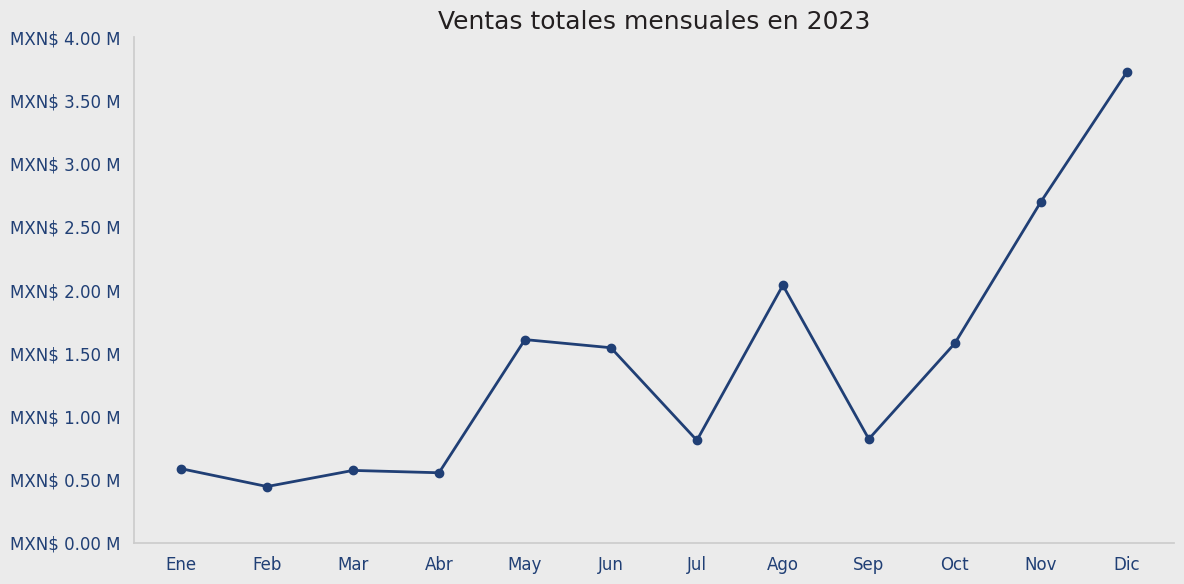

In [54]:
# Crear figura
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

# Dibujar la l√≠nea de ventas
ax.plot(ventas_mensuales.index, ventas_mensuales.values, marker='o', color=AZUL_1, linewidth=2)

# T√≠tulo del gr√°fico
ax.set_title("Ventas totales mensuales en 2023", fontsize=18, color=GRIS_5)

# Configurar las etiquetas del eje X.
ax.set_xticks(ventas_mensuales.index)
ax.set_xticklabels(ventas_mensuales.index, fontsize=12, color=AZUL_1)
ax.set_xlabel("")

# Configurar las etiquetas del eje Y.
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticks(), fontsize=12, color=AZUL_1)
ax.set_ylabel("")
# Formatear eje y como "MXN$ xx.xx M"
formatter = FuncFormatter(lambda x, _: f"MXN$ {x/1e6 :,.2f} M")
ax.yaxis.set_major_formatter(formatter)

# Eliminar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajuste final y mostrar gr√°fico
plt.tight_layout()
plt.grid(False)
plt.show()

A continuaci√≥n se presenta un c√≥digo alternativo para personalizar las etiquetas del eje Y:

```python
# Configurar etiquetas del eje y
ax.set_ylabel('')
ax.set_yticklabels([f'MXN$ {x/1e6 :,.2f} M' for x in ax.get_yticks()], fontsize=12, color=AZUL_1)  # AZUL_1
```

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬°Genial! Ahora que nuestro gr√°fico ya tiene la identidad visual, vamos a a√±adir algunos elementos visuales adicionales.

Dibuja 4 c√≠rculos de radio 200, transparentes con el borde en color ROJO_1 y con el centro en las coordenadas del 5¬∫, 8¬∫, 11¬∫ y 12¬∫ puntos, respectivamente. A la izquierda de cada c√≠rculo enumera del 1 al 4.


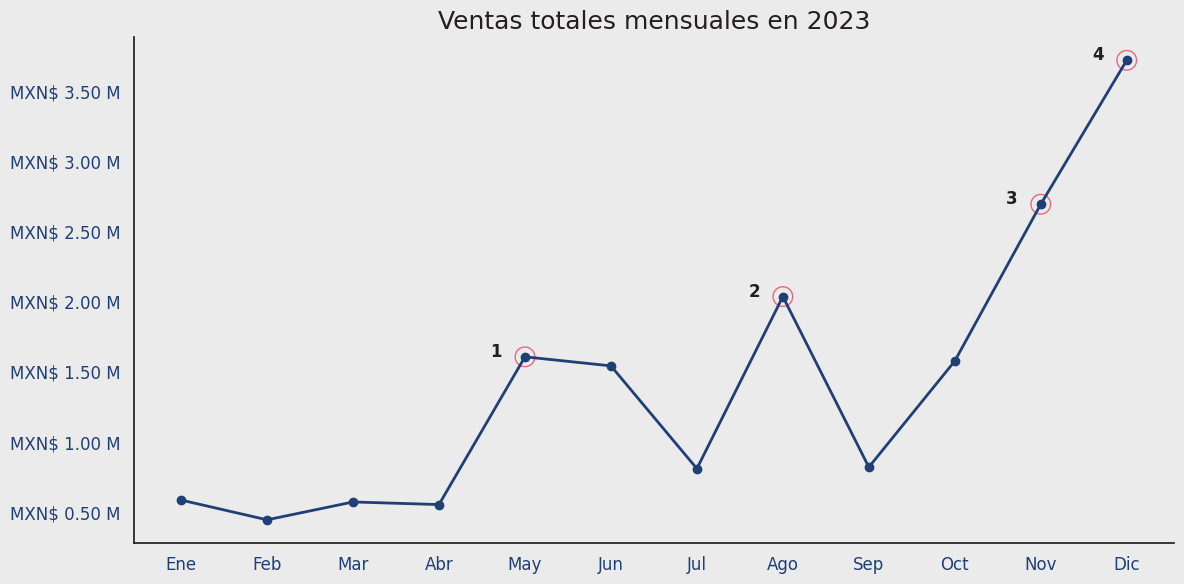

In [55]:
# Crear figura
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

# Dibujar la l√≠nea de ventas
ax.plot(ventas_mensuales.index, ventas_mensuales.values, marker='o', color=AZUL_1, linewidth=2)

# T√≠tulo del gr√°fico
ax.set_title("Ventas totales mensuales en 2023", fontsize=18, color=GRIS_5)

# Configurar eje X
ax.set_xticks(ventas_mensuales.index)
ax.set_xticklabels(ventas_mensuales.index, fontsize=12, color=AZUL_1)
ax.set_xlabel("")
ax.tick_params(axis='x', color=GRIS_5)

# Configurar eje Y
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticks(), fontsize=12, color=AZUL_1)
ax.set_ylabel("")
formatter = FuncFormatter(lambda x, _: f"MXN$ {x/1e6:,.2f} M")
ax.yaxis.set_major_formatter(formatter)
ax.tick_params(axis='y', color=GRIS_5)

# Eliminar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(GRIS_5)
ax.spines['left'].set_color(GRIS_5)

# Dibujar c√≠rculos alrededor de puntos clave
coordenadas = [4, 7, 10, 11]  # √çndices de los puntos seleccionados
for i, idx in enumerate(coordenadas):
    x = ventas_mensuales.index[idx]
    y = ventas_mensuales.values[idx]

    # C√≠rculo transparente con borde ROJO_1
    plt.scatter(x, y, s=200, color='none', edgecolors=ROJO_1, alpha=0.7)

    # A√±adir n√∫mero a la izquierda del c√≠rculo
    ax.text(x = idx - 0.4,
            y = y + 250,
            s = str(i+1),
            fontsize=12,
            color=GRIS_5,
            fontweight='bold')

# Ajuste final
plt.tight_layout()
plt.grid(False)
plt.show()

A continuaci√≥n se presenta un c√≥digo alternativo para agregar c√≠rculos a la figura. La diferencia est√° en c√≥mo se indica a Maplotlib las coordenadas del c√≠rculo. Aqu√≠ se genera un iterable con tuplas, cuyo primer elemento es un √≠ndice y el segundo elemento es una coordenada (tupla xy).

```python
# A√±adir c√≠rculos numerados
for i, point in enumerate([(4, ventas_mensuales.iloc[4]), (7, ventas_mensuales.iloc[7]), (10, ventas_mensuales.iloc[10]), (11, ventas_mensuales.iloc[11])], start=1):
    plt.scatter(point[0], point[1], s=200, color='none', edgecolors=ROJO_1, alpha=0.7)
    plt.text(point[0] - 0.3, point[1] + 0.1, str(i), fontsize=12, color=ROJO_1)
```

<font color="7b71ff" size=4> Comentarios: </font>

---
Hemos a√±adido 4 c√≠rculos que representan los puntos con mayor volumen de ventas de Zoop en 2023. Podemos plantear algunas hip√≥tesis:

1. En mayo, tenemos una de las fechas m√°s relevantes en ventas: el D√≠a de las Madres, lo que puede justificar el aumento en las ventas de Zoop.
2. En agosto, hay una situaci√≥n que pueden explicar el crecimiento: la vuelta a clases en el segundo semestre en algunos estados de Mexico.
3. En noviembre, destaca la Black Friday, uno de los principales per√≠odos de alta en las ventas, considerado de gran relevancia para el comercio minorista.
4. En diciembre, tenemos  las festividades de A√±o Nuevo, consideradas el per√≠odo de mayores ventas no solo para Zoop, sino para el comercio minorista en general.

La recomendaci√≥n es investigar m√°s a fondo los datos y llegar a tus propias conclusiones.


Antes de ajustar los √∫ltimos 5 visuales de nuestro proyecto, vamos a hacer una peque√±a modificaci√≥n en los 2 primeros, convirti√©ndolos en funciones, lo que facilitar√° m√°s adelante cuando realicemos la exportaci√≥n


## **4.5 - Desaf√≠o: Refinando las visualizaciones**
**Desaf√≠o 1:**

Construye y ejecuta un prompt en ChatGPT para refinar el visual que presenta el facturamiento de las ventas por regi√≥n. Las instrucciones para el refinamiento son las siguientes:

* Fondo de la figura y del √°rea del gr√°fico en el color GRIS_1
* Color de las columnas en AQUA_1 (si deseas destacar solo una, puedes recurrir a AQUA_3, por ejemplo).
* Tama√±o de la figura de (16,9).
* Cambia el t√≠tulo de la figura a un tama√±o de 18 y color GRIS_5, ajusta las etiquetas y r√≥tulos del eje x e y, cuando existan, a un tama√±o 12 y color AZUL_1.
* Elimina el m√°ximo de bordes posible y ajusta los datos para que se presenten en las barras en orden de millones, con color AZUL_1 y tama√±o 12.

**Desaf√≠o 2:**

Construye y ejecuta un prompt en ChatGPT para refinar el visual que presenta la proporci√≥n de personas pre-registradas en Zoop Pay. Las instrucciones para el refinamiento son las siguientes:

* Fondo de la figura y del √°rea del gr√°fico en el color GRIS_1.
* Color de las porciones: AZUL_1 para "S√≠" y GRIS_3 para "No".
* Tama√±o de la figura de (6,6).
* Cambia el t√≠tulo de la figura a un tama√±o de 18 y color GRIS_5.
A√±ade etiquetas en las porciones con tama√±o 12 y los porcentajes tambi√©n con tama√±o 12 y en negrita. Los porcentajes deben estar en color BLANCO y las etiquetas de las porciones en el mismo color que las porciones.
* Ajusta la rosca para que su ancho sea de 0.4 y los porcentajes de las porciones est√©n en la posici√≥n 0.8 en relaci√≥n al centro.
Evita explosiones de porciones y efectos que dificulten el an√°lisis del gr√°fico.




### **Desafio 1:**
> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos mejorar el visual que representa la facturaci√≥n de las ventas por regi√≥n.

Este fue el c√≥digo proporcionado inicialmente para generar el visual:
```python
# Agrupar por regi√≥n y sumar la facturaci√≥n
df_desafio['facturacion'] = (df_desafio['precio_unitario'] * df_desafio['cantidad']) + df_desafio['envio']
facturacion_region = df_desafio.groupby('region')['facturacion'].sum().sort_values()

# Crear gr√°fico de columnas
facturacion_region.plot(kind='bar', color='skyblue', figsize=(8, 5))

# Personalizaci√≥n
plt.title('Facturaci√≥n por Regi√≥n')
plt.xlabel('Regi√≥n')
plt.ylabel('Facturaci√≥n Total (MXN$)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) #alpha establece la transparencia del grid.
plt.tight_layout()
plt.show()
```

Por favor, modifica el c√≥digo proporcionado seg√∫n las siguientes instrucciones:
* Tama√±o de la figura de (16,9).
* Fondo de la figura y del √°rea del gr√°fico en el color GRIS_1.
* Color de las columnas en AQUA_1, salvo el de la regi√≥n con la mayor facturaci√≥n que ser√° de color AQUA_3.
* Cambia el t√≠tulo de la figura a un tama√±o de 18 y color GRIS_5.
* Elimina el t√≠tulo, las etiquetas y los r√≥tulos del eje y.
* Elimina el t√≠tulo del eje x, y ajusta las etiquetas y r√≥tulos del eje x a un tama√±o 12 y color AZUL_1.
* Elimina los bordes superior, derecho e izquierdo y escribe la cifra de facturaci√≥n encima de cada barra encima en formato de millones, con color AZUL_1 y tama√±o 12.
El formato de millones puede asemejarse al siguiente:
`f"MXN$ {x/1e6 :,.2f} M"`

In [98]:
def facturacion_por_region():
  # Calcular facturaci√≥n
  df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']
  facturacion_region = df.groupby('region')['facturacion'].sum().sort_values(ascending=False)

  # Identificar la regi√≥n con mayor facturaci√≥n
  region_top = facturacion_region.idxmax()

  # Asignar colores: AQUA_1 por defecto, AQUA_3 para la regi√≥n top
  colores = [AQUA_3 if region == region_top else AQUA_1 for region in facturacion_region.index]

  # Crear figura
  fig, ax = plt.subplots(figsize=(16, 9))
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # Gr√°fico de barras
  bars = ax.bar(facturacion_region.index, facturacion_region.values, color=colores)

  # T√≠tulo
  ax.set_title('Facturaci√≥n por Regi√≥n', fontsize=18, color=GRIS_5)

  # Configurar eje x
  ax.set_xlabel('')
  ax.set_xticks(range(len(facturacion_region.index)))
  ax.set_xticklabels(facturacion_region.index, fontsize=12, color=AZUL_1, rotation=45)

  # Eliminar eje y y bordes
  ax.set_ylabel('')
  ax.set_yticks([])
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  # Mostrar valores encima de las barras
  for bar in bars:
      height = bar.get_height()
      ax.annotate(f"MXN$ {height / 1e6:,.2f} M",
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 5),  # desplazamiento
                  textcoords="offset points",
                  ha='center', va='bottom',
                  fontsize=12, color=AZUL_1)

  # Ajuste final
  plt.tight_layout()
  plt.grid(False)
  return fig

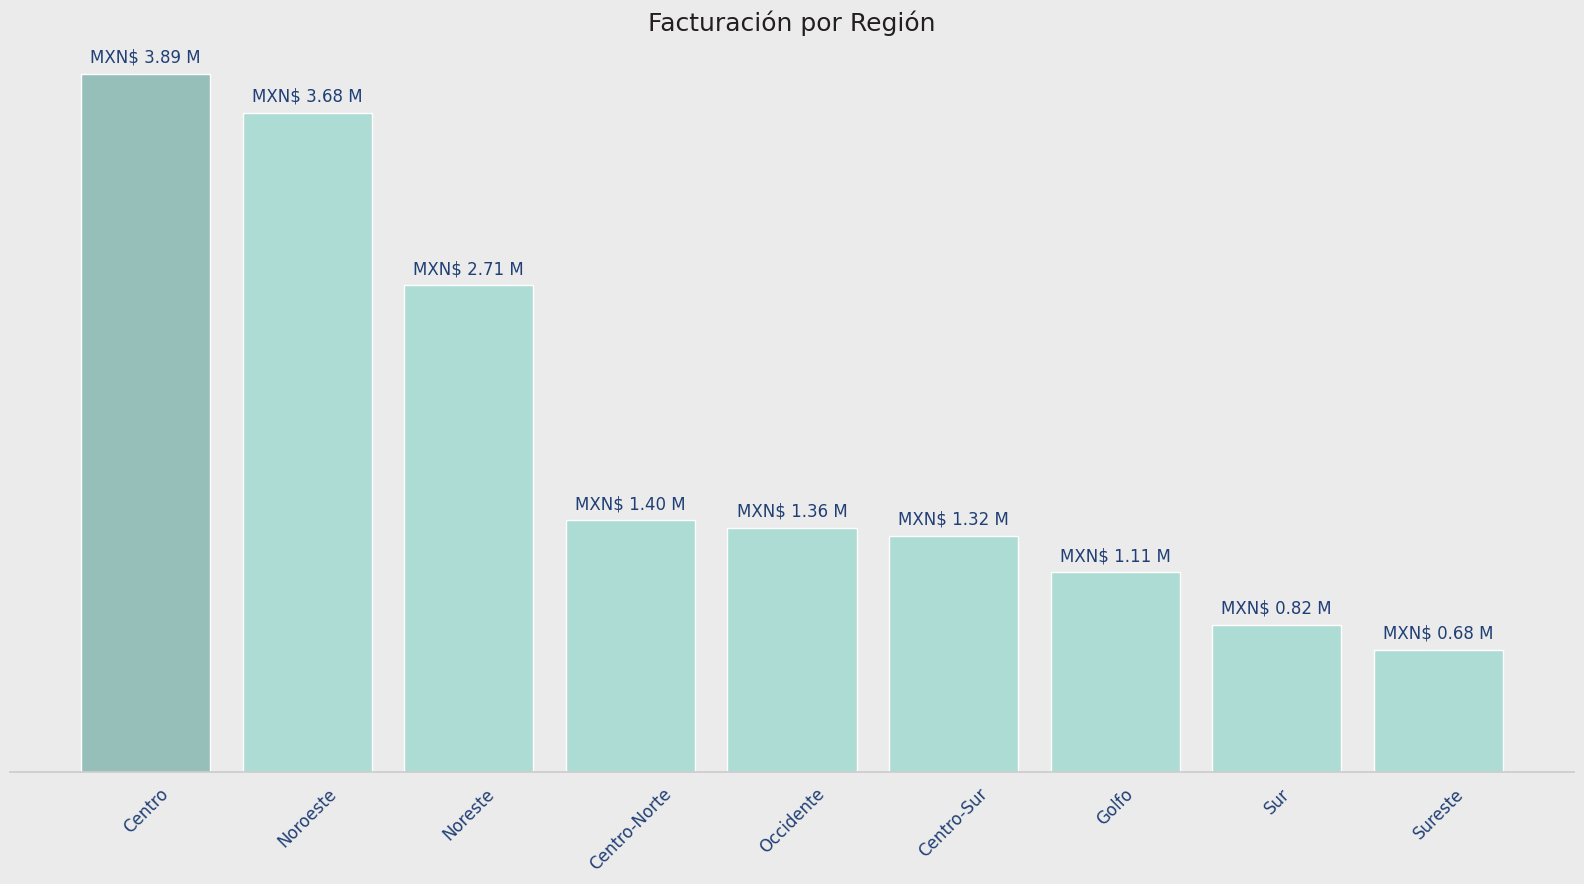

In [99]:
facturacion_por_region().show()

<font color="7b71ff" size=4> Comentarios: </font>

---
A continuaci√≥n se presenta un c√≥digo alternativo para agregar texto encima de las barras. Cabe destacar que antes de a√±adir el texto, se ajust√≥ la escala del eje Y en el m√©todo `plt.bar`.
```python
# Creaci√≥n del gr√°fico de columnas
plt.bar(facturacion_por_region['region'], facturacion_por_region['facturacion'] / 1e6, color=AQUA_1)
#Se a√±ade texto a las barras
for index, value in enumerate(facturacion_por_region['facturacion']):
    plt.text(index, value / 1e6 + 0.1, f'MXN$ {value / 1e6:.1f}M', color=AZUL_1, ha='center', fontsize=12)
```

### **Desafio 2:**
> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df_desafio" y queremos mejorar el visual que representa la proporci√≥n de personas pre-registradas en Zoop Pay.

Este fue el c√≥digo proporcionado inicialmente para generar el visual:
```python
# Contar la cantidad de registros por valor en 'zoop_pay'
zoop_counts = df_desafio['zoop_pay'].value_counts()

# Colores personalizados
colors = ['#3EB489', '#C0C0C0']  # Verde menta oscuro, Gris
labels = zoop_counts.index

# Crear el gr√°fico de dona
fig, ax = plt.subplots()
ax.pie(
    zoop_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=[0.05 if label == 'S√≠' else 0 for label in labels],
    wedgeprops={'width': 0.3}  # Hace la dona
)

# T√≠tulo
ax.set_title('Proporci√≥n de Pre-registros en Zoop Pay')
plt.show()
```

Por favor, modifica el c√≥digo proporcionado seg√∫n las siguientes instrucciones:
* Fondo de la figura y del √°rea del gr√°fico en el color GRIS_1.
* Color de las porciones: AZUL_1 para "S√≠" y GRIS_3 para "No".
* Tama√±o de la figura de (6,6).
* Cambia el t√≠tulo de la figura a un tama√±o de 18 y color GRIS_5.
* A√±ade etiquetas en las porciones con tama√±o 12 y los porcentajes tambi√©n con tama√±o 12 y en negrita. Los porcentajes deben estar en color BLANCO y las etiquetas de las porciones en el mismo color que las porciones.
* Ajusta la rosca para que su ancho sea de 0.4 y los porcentajes de las porciones est√©n en la posici√≥n 0.8 en relaci√≥n al centro.

Evita explosiones de porciones y efectos que dificulten el an√°lisis del gr√°fico.

In [100]:
def proporcion_zooppay():
  # Contar la cantidad de registros por valor en 'zoop_pay'
  zoop_counts = df_desafio['zoop_pay'].value_counts()

  # Colores personalizados
  colores = [AZUL_1 if label == 'S√≠' else GRIS_3 for label in zoop_counts.index]
  etiquetas = zoop_counts.index

  # Crear la figura
  fig, ax = plt.subplots(figsize=(6, 6))
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # Gr√°fico de dona
  wedges, texts, autotexts = ax.pie(
      zoop_counts,
      labels=etiquetas,
      colors=colores,
      autopct='%1.1f%%',
      pctdistance=0.8,
      startangle=90,
      wedgeprops={'width': 0.4}
  )

  # Personalizaci√≥n de etiquetas y porcentajes
  for text, wedge_color in zip(texts, colores):
      text.set_color(wedge_color)
      text.set_fontsize(12)

  for autotext in autotexts:
      autotext.set_color(BLANCO)
      autotext.set_fontsize(12)
      autotext.set_weight('bold')

  # T√≠tulo
  ax.set_title('¬øPre-registrado en Zoop Pay?', fontsize=18, color=GRIS_5)

  # Mostrar el gr√°fico
  plt.tight_layout()
  return fig

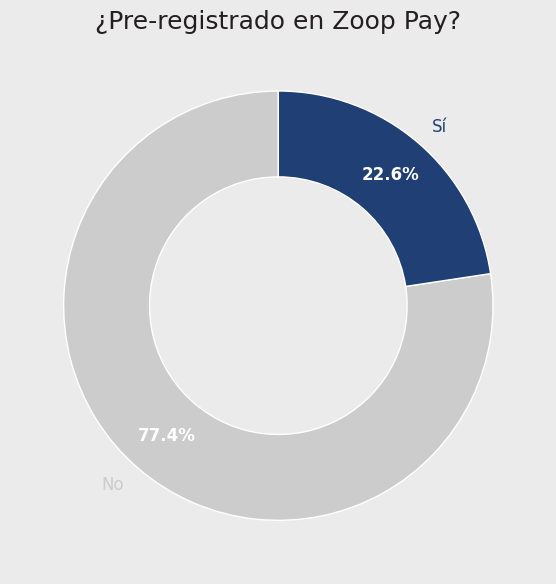

In [101]:
proporcion_zooppay().show()

# **Clase 5 - Finalizando el proyecto**

Antes de ajustar los √∫ltimos 5 visuales de nuestro proyecto, haremos una peque√±a modificaci√≥n en los 2 primeros pas√°ndolos a funci√≥n, lo que facilitar√° m√°s adelante cuando realicemos la exportaci√≥n de los visuales.


### **Gr√°fico 1 - M√©todos de pago m√°s utilizados en 2023:**

In [83]:
def metodos_pago():
  #Ordenamos los valores en orden descendente.
  metodos_de_pago.sort_values(by='Cantidad', ascending=False, inplace=True)

  # Calcular el porcentaje de las dos primeras categor√≠as
  porcentaje = ((metodos_de_pago['Cantidad'].iloc[0] + metodos_de_pago['Cantidad'].iloc[1]) / metodos_de_pago['Cantidad'].sum()) * 100

  # Crear figura y ejes
  fig, ax = plt.subplots(figsize=(10, 6))
  fig.patch.set_facecolor(GRIS_1)  # Fondo de la figura
  ax.set_facecolor(GRIS_1)         # Fondo del gr√°fico

  # Crear gr√°fico de barras
  sns.barplot(data=metodos_de_pago, x='Metodo de Pago', y='Cantidad', ax=ax, color=ROJO_1)

  # T√≠tulo del gr√°fico
  ax.set_title("M√©todos de pago m√°s utilizados en 2023", fontsize=18, color=GRIS_5)

  # Etiquetas del eje X
  ax.set_xlabel("M√©todo de pago", fontsize=12, color=AZUL_1)
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, color=AZUL_1)

  # Ocultar eje Y y etiquetas
  ax.set_ylabel("")
  ax.set_yticks([])

  # Eliminar bordes superior, derecho e izquierdo
  sns.despine(left=True, right=True, top=True)

  # Agregar etiquetas de cantidad encima de cada barra
  for m,c in zip(metodos_de_pago['Metodo de Pago'],metodos_de_pago['Cantidad']):
    ax.text(
        m,
        c + 0.2,
        str(c),
        ha='center',
        va='bottom',
        fontsize=12,
        color=AZUL_1
    )

  # A√±adir el texto dentro del √°rea del gr√°fico
  ax.text(
      x=1.5,
      y=2500,
      s=(f"$\\bf{{{porcentaje:.2f}}}$% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \n"
        f"para el pago. Ser√≠a interesante considerar asociaciones con \n"
        f"bancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \n"
        f"a nuestra clientela."),
      fontsize=10,
      color=AZUL_3,
      ha='left',
      va='center'
  )

  # Mostrar el gr√°fico
  plt.tight_layout()
  return fig

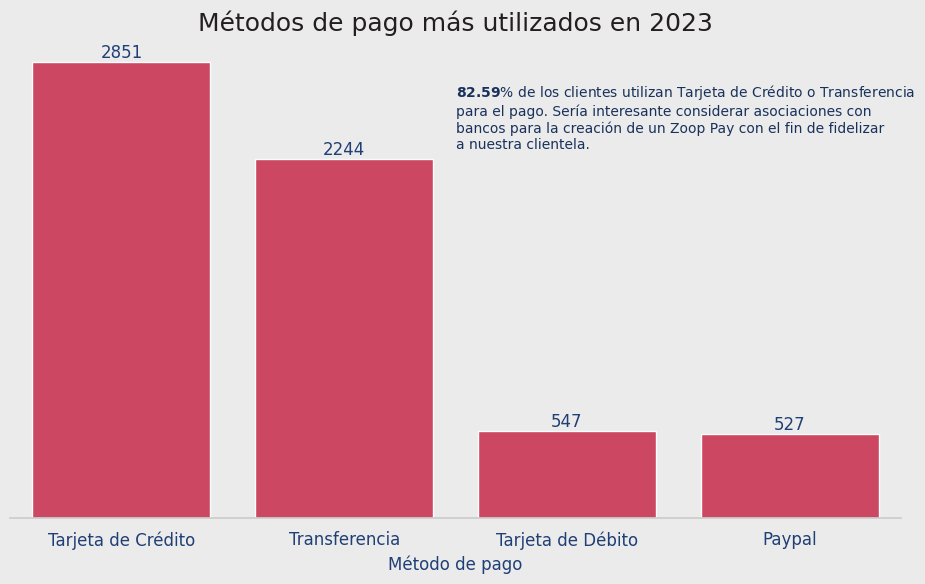

In [85]:
metodos_pago().show()

### **Gr√°fico 2 - Total de ventas mensuales en 2023:**

In [86]:
def ventas_mensuales():
  # Crear columna con el nombre del mes y agrupar
  df['mes'] = df['fecha'].dt.strftime('%B')
  ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
  # Traducir el √≠ndice al espa√±ol para mostrarlo en el eje x
  ventas_mensuales.index = ventas_mensuales.index.map(meses)

  # Crear figura
  fig, ax = plt.subplots(figsize=(12, 6))
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # Dibujar la l√≠nea de ventas
  ax.plot(ventas_mensuales.index, ventas_mensuales.values, marker='o', color=AZUL_1, linewidth=2)

  # T√≠tulo del gr√°fico
  ax.set_title("Ventas totales mensuales en 2023", fontsize=18, color=GRIS_5)

  # Configurar eje X
  ax.set_xticks(ventas_mensuales.index)
  ax.set_xticklabels(ventas_mensuales.index, fontsize=12, color=AZUL_1)
  ax.set_xlabel("")
  ax.tick_params(axis='x', color=GRIS_5)

  # Configurar eje Y
  ax.set_yticks(ax.get_yticks())
  ax.set_yticklabels(ax.get_yticks(), fontsize=12, color=AZUL_1)
  ax.set_ylabel("")
  formatter = FuncFormatter(lambda x, _: f"MXN$ {x/1e6:,.2f} M")
  ax.yaxis.set_major_formatter(formatter)
  ax.tick_params(axis='y', color=GRIS_5)

  # Eliminar bordes superior y derecho
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_color(GRIS_5)
  ax.spines['left'].set_color(GRIS_5)

  # Dibujar c√≠rculos alrededor de puntos clave
  coordenadas = [4, 7, 10, 11]  # √çndices de los puntos seleccionados
  for i, idx in enumerate(coordenadas):
      x = ventas_mensuales.index[idx]
      y = ventas_mensuales.values[idx]

      # C√≠rculo transparente con borde ROJO_1
      plt.scatter(x, y, s=200, color='none', edgecolors=ROJO_1, alpha=0.7)

      # A√±adir n√∫mero a la izquierda del c√≠rculo
      ax.text(x = idx - 0.4,
              y = y + 250,
              s = str(i+1),
              fontsize=12,
              color=GRIS_5,
              fontweight='bold')

  # Ajuste final
  plt.tight_layout()
  plt.grid(False)
  return fig

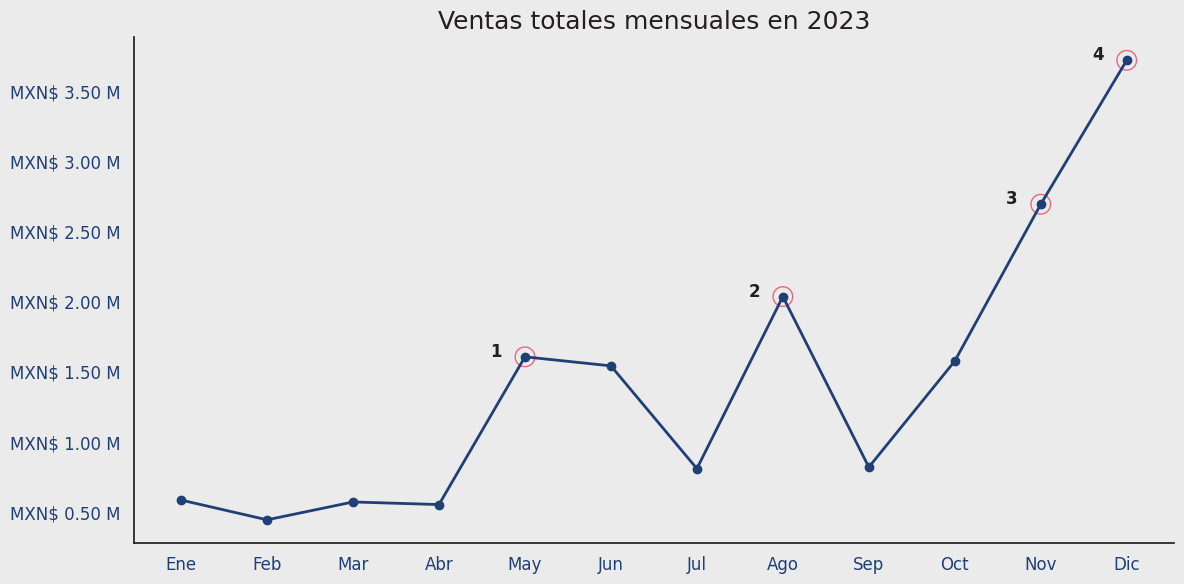

In [87]:
ventas_mensuales().show()

Ahora que guardamos los 2 primeros gr√°ficos en funci√≥n, vamos a modificar uno m√°s, **Facturaci√≥n por categor√≠a de producto en 2023**, utilizando las t√©cnicas de storytelling que ya hemos aprendido.


### **Gr√°fico 3 - Facturaci√≥n por categor√≠a de producto en 2023:**


Vamos a continuar con los gr√°ficos generados a lo largo de las clases, partiendo ahora del gr√°fico de facturaci√≥n por categor√≠a de producto aplicando las t√©cnicas de storytelling que aprendimos aqu√≠ en el curso mediante el uso de la IA.


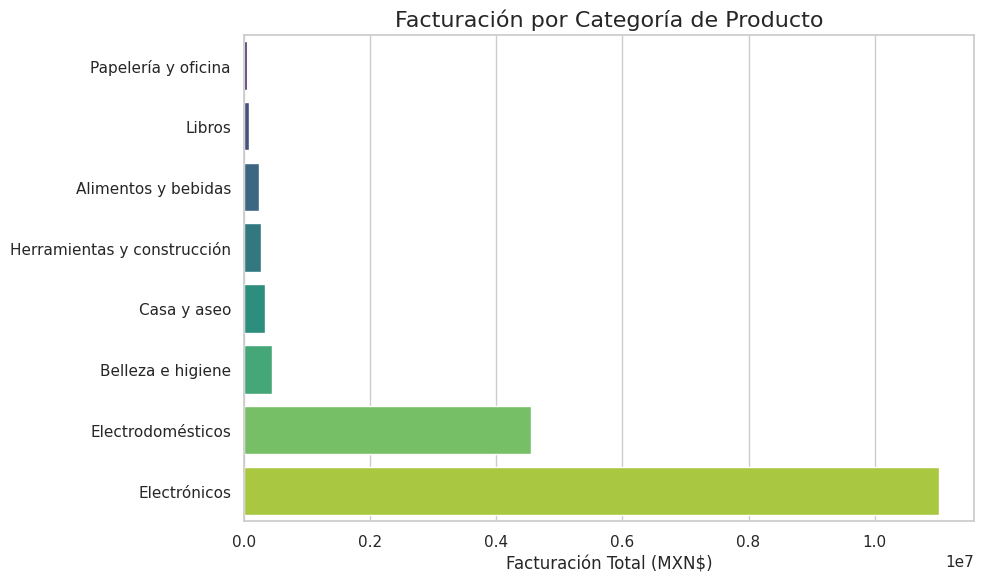

In [64]:
# Crear columna con la facturaci√≥n total por fila
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# Agrupar por categor√≠a y sumar la facturaci√≥n
facturacion_categoria = df.groupby('categoria')['facturacion'].sum().reset_index()
facturacion_categoria = facturacion_categoria.sort_values(by ='facturacion', ascending=True)

# Crear gr√°fico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x='facturacion', y='categoria', data=facturacion_categoria, palette='viridis')
plt.title('Facturaci√≥n por Categor√≠a de Producto', fontsize=16)
plt.xlabel('Facturaci√≥n Total (MXN$)')
plt.ylabel('')
plt.tight_layout()
plt.show()

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

¬øVamos a proceder con otro gr√°fico? Ahora, vamos refinar el gr√°fico de facturaci√≥n por categor√≠a. Recuerda que este gr√°fico fue de barras horizontales.

El script original del gr√°fico es el siguiente:

```python

# Crear columna con la facturaci√≥n total por fila
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# Agrupar por categor√≠a y sumar la facturaci√≥n
facturacion_categoria = df.groupby('categoria')['facturacion'].sum().reset_index()
facturacion_categoria = facturacion_categoria.sort_values(by ='facturacion', ascending=True)

# Crear gr√°fico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x='facturacion', y='categoria', data=facturacion_categoria, palette='viridis')
plt.title('Facturaci√≥n por Categor√≠a de Producto', fontsize=16)
plt.xlabel('Facturaci√≥n Total (MXN$)')
plt.ylabel('')
plt.tight_layout()
plt.show()
```
Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, las barras en el color AQUA_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Facturaci√≥n por categor√≠a de producto en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben ser suprimidas al igual que los labels de los ejes x y y (xlabel y ylabel), y las etiquetas del eje y (yticks) deben tener tama√±o 12 con el color AZUL_1. Todas las bordes del gr√°fico deben ser suprimidas.

Adem√°s, es necesario mostrar el total de la facturaci√≥n de cada categor√≠a al lado derecho de cada barra, con el texto tambi√©n en color AZUL_1 y tama√±o 12.

Tambi√©n vamos a agregar un texto dentro del √°rea del gr√°fico. Para ello, divide el valor de la 1¬™ barra entre la suma de todas las barras y convi√©rtelo en un porcentaje, almacen√°ndolo en la variable "porcentaje".

Ahora, en la posici√≥n x = 0.4e7 y y = 5, agrega el siguiente texto con tama√±o 12 y color AZUL_3: `f"$\\bf{porcentaje:.2f}$% de las ventas corresponden √∫nicamente a las ventas de Electr√≥nica.\nEsto equivale a casi el doble en relaci√≥n con todas las dem√°s categor√≠as\npresentes en el portafolio de Zoop."`.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [88]:
def facturacion_por_categoria():
  # Agrupar por categor√≠a y sumar la facturaci√≥n
  facturacion_categoria = df.groupby('categoria')['facturacion'].sum().reset_index()
  facturacion_categoria = facturacion_categoria.sort_values(by='facturacion', ascending=False)

  # Calcular porcentaje de la primera barra (la menor facturaci√≥n)
  porcentaje = (facturacion_categoria['facturacion'].iloc[0] / facturacion_categoria['facturacion'].sum()) * 100

  # Crear figura y ejes
  fig, ax = plt.subplots(figsize=(10, 6))
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # Crear gr√°fico de barras horizontales
  barras = ax.barh(
      y=facturacion_categoria['categoria'],
      width=facturacion_categoria['facturacion'],
      color=AQUA_1
  )

  # T√≠tulo
  ax.set_title('Facturaci√≥n por categor√≠a de producto en 2023', fontsize=18, color=GRIS_5)

  # Etiquetas del eje Y
  ax.set_yticklabels(facturacion_categoria['categoria'], fontsize=12, color=AZUL_1)

  # Suprimir etiquetas del eje X y bordes
  ax.set_xticks([])
  ax.set_xlabel('')
  ax.set_ylabel('')
  for spine in ['top', 'bottom', 'left', 'right']:
      ax.spines[spine].set_visible(False)

  # A√±adir los valores de facturaci√≥n al final de cada barra
  for i, (factura, y) in enumerate(zip(facturacion_categoria['facturacion'], facturacion_categoria['categoria'])):
      ax.text(factura + 1e5, i, f"MXN$ {factura/1e6:.2f} M", va='center', fontsize=12, color=AZUL_1)

  # Anotaci√≥n con an√°lisis
  texto = f"$\\bf{porcentaje:.2f}$% de las ventas corresponden √∫nicamente a las ventas de Electr√≥nica.\n" + \
          "Esto equivale a casi el doble en relaci√≥n con todas las dem√°s categor√≠as\n" + \
          "presentes en el portafolio de Zoop."
  ax.text(0.4e7, 5, texto, fontsize=12, color=AZUL_3)

  # Mostrar
  plt.tight_layout()
  plt.grid(False)
  return fig

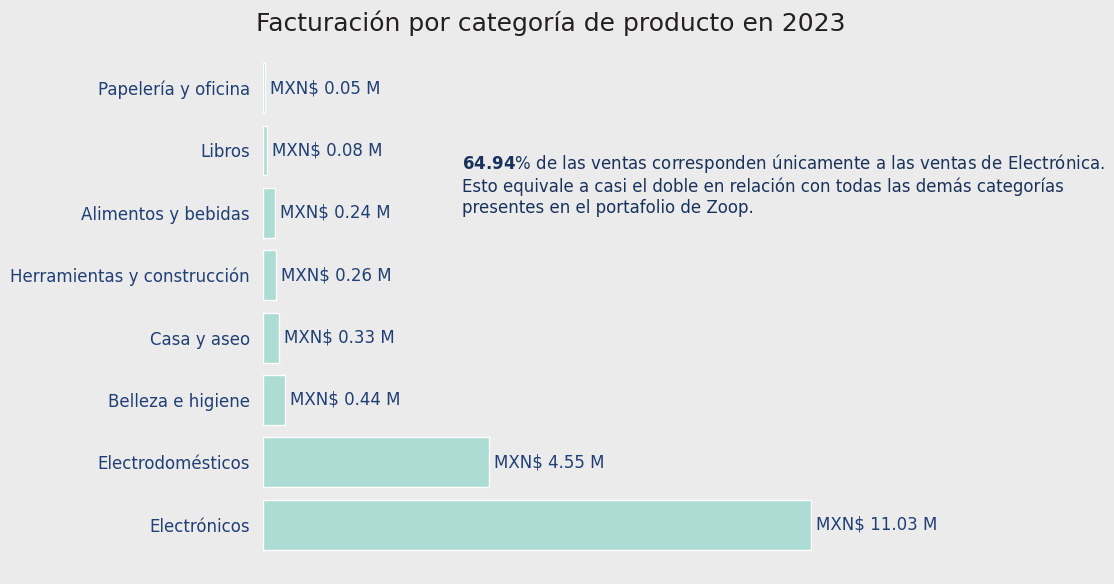

In [89]:
facturacion_por_categoria().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Hicimos con un solo prompt la inserci√≥n de las etiquetas, la modificaci√≥n de los colores y a√±adimos un texto explicativo. Con la secuencia de explicaciones para ChatGPT, este reconoce algunos patrones en la construcci√≥n y genera parte del c√≥digo incluso sin m√°s detalles.


## **5.2 - Ajustando los visuales de composici√≥n**

---


Ya hemos llegado a pr√°cticamente la mitad de los gr√°ficos refinados. Ahora, en este tema, ajustaremos 2 m√°s aplicando las t√©cnicas de storytelling que aprendimos aqu√≠ en el curso mediante el uso de la IA.


### **Gr√°fico 4 - Ventas por trimestre y m√©todo de pago:**

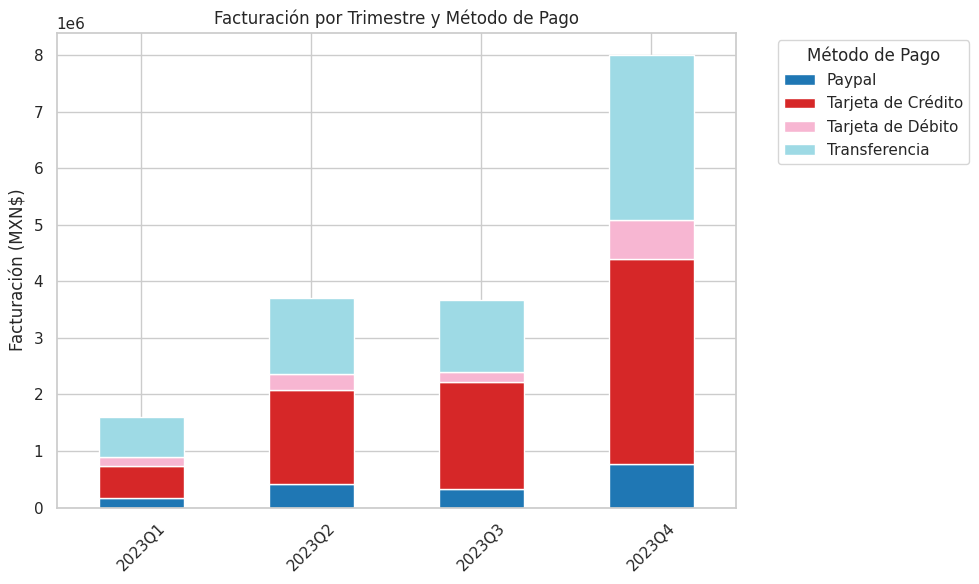

In [67]:
trimestres = {1:'2023Q1', 2:'2023Q2', 3:'2023Q3', 4:'2023Q4'}

# Paso 2: Agrupar por trimestre y m√©todo de pago, sumando la facturaci√≥n
ventas_trimestre = df.groupby([df['fecha'].dt.quarter, 'metodo_pago'])['facturacion'].sum()
ventas_trimestre = ventas_trimestre.unstack() #Se convierte las etiquetas del √∫ltimo indice (m√©todo_pago) en columnas.
ventas_trimestre.reset_index(inplace=True) #Se convierte el √≠ndice restante (fecha) en columna.
ventas_trimestre['fecha']=ventas_trimestre['fecha'].map(trimestres) #Se reemplazan los n√∫meros en la columna 'fecha' por los valores del diccionario "trimestres".
ventas_trimestre = ventas_trimestre.rename(columns={'fecha':'trimestre'}) #Se reenombra el nombre de la columna fecha a trimestre.

# Paso 3: Crear el gr√°fico de barras apiladas
metodos_pago = ['Paypal', 'Tarjeta de Cr√©dito', 'Tarjeta de D√©bito', 'Transferencia'] #Se enlista las columnas que se graficar√°n en el eje Y.
ventas_trimestre.plot(x='trimestre', y=metodos_pago, kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Paso 4: Personalizar el gr√°fico
plt.title('Facturaci√≥n por Trimestre y M√©todo de Pago')
plt.xlabel('')
plt.ylabel('Facturaci√≥n (MXN$)')
plt.xticks(rotation=45)
plt.legend(title='M√©todo de Pago', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Ahora vamos con el gr√°fico de Ventas por Trimestre y M√©todo de Pago que producimos anteriormente. Vamos a refinarlo usando las siguientes directrices.

Recuerda que el script original del gr√°fico es el siguiente:
```python

trimestres = {1:'2023Q1', 2:'2023Q2', 3:'2023Q3', 4:'2023Q4'}

# Paso 2: Agrupar por trimestre y m√©todo de pago, sumando la facturaci√≥n
ventas_trimestre = df.groupby([df['fecha'].dt.quarter, 'metodo_pago'])['facturacion'].sum()
ventas_trimestre = ventas_trimestre.unstack() #Se convierte las etiquetas del √∫ltimo indice (m√©todo_pago) en columnas.
ventas_trimestre.reset_index(inplace=True) #Se convierte el √≠ndice restante (fecha) en columna.
ventas_trimestre['fecha']=ventas_trimestre['fecha'].map(trimestres) #Se reemplazan los n√∫meros en la columna 'fecha' por los valores del diccionario "trimestres".
ventas_trimestre = ventas_trimestre.rename(columns={'fecha':'trimestre'}) #Se reenombra el nombre de la columna fecha a trimestre.

# Paso 3: Crear el gr√°fico de barras apiladas
metodos_pago = ['Paypal', 'Tarjeta de Cr√©dito', 'Tarjeta de D√©bito', 'Transferencia'] #Se enlista las columnas que se graficar√°n en el eje Y.
ventas_trimestre.plot(x='trimestre', y=metodos_pago, kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Paso 4: Personalizar el gr√°fico
plt.title('Facturaci√≥n por Trimestre y M√©todo de Pago')
plt.xlabel('')
plt.ylabel('Facturaci√≥n (MXN$)')
plt.xticks(rotation=45)
plt.legend(title='M√©todo de Pago', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1 y el tama√±o de la figura debe ser de (10, 6). La secuencia de colores de las columnas apiladas (palette) es [BLANCO, GRIS_3, AQUA_1, AQUA_3].

El t√≠tulo de la figura es "Ventas por Trimestre y M√©todo de Pago en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar a 0 grados y tener tama√±o 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben estar en el formato f"MXN$ valor M" sin decimales y las etiquetas de los ejes x e y (xlabel e ylabel) deben ser suprimidas. Todos los bordes del gr√°fico deben ser suprimidos(['top','bottom','left','right]).

Tambi√©n agrega una cuadr√≠cula punteada en y.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [90]:
def ventas_por_trimestre():
  # Diccionario para traducir n√∫meros de trimestre a etiquetas amigables
  trimestres = {1: '2023Q1', 2: '2023Q2', 3: '2023Q3', 4: '2023Q4'}

  # Agrupar por trimestre y m√©todo de pago, sumando la facturaci√≥n
  ventas_trimestre = df.groupby([df['fecha'].dt.quarter, 'metodo_pago'])['facturacion'].sum()
  ventas_trimestre = ventas_trimestre.unstack()
  ventas_trimestre.reset_index(inplace=True)
  ventas_trimestre['fecha'] = ventas_trimestre['fecha'].map(trimestres)
  ventas_trimestre = ventas_trimestre.rename(columns={'fecha': 'trimestre'})

  # Orden de los m√©todos de pago
  metodos_pago = ['Paypal', 'Tarjeta de Cr√©dito', 'Tarjeta de D√©bito', 'Transferencia']

  # Crear figura
  fig, ax = plt.subplots(figsize=(10, 6))
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # Colores personalizados
  colores = [BLANCO, GRIS_3, AQUA_1, AQUA_3]

  # Dibujar gr√°fico de barras apiladas
  ventas_trimestre[metodos_pago].plot(
      kind='bar',
      stacked=True,
      ax=ax,
      color=colores,
      width=0.7,
      edgecolor=GRIS_1
  )

  # Establecer etiquetas de trimestres en el eje x
  ax.set_xticks(range(len(ventas_trimestre)))
  ax.set_xticklabels(ventas_trimestre['trimestre'], fontsize=12, color=AZUL_1, rotation=0)

  # Formatear eje y como "MXN$ X M" sin decimales
  formatter = FuncFormatter(lambda x, _: f"MXN$ {x/1e6:.0f} M")
  ax.yaxis.set_major_formatter(formatter)
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

  # Eliminar t√≠tulos de ejes
  ax.set_xlabel('')
  ax.set_ylabel('')

  # T√≠tulo
  ax.set_title('Ventas por Trimestre y M√©todo de Pago en 2023', fontsize=18, color=GRIS_5)

  # Eliminar bordes
  for spine in ['top', 'right', 'left', 'bottom']:
      ax.spines[spine].set_visible(False)

  # Cuadr√≠cula punteada en el eje y
  ax.grid(axis='y', linestyle='--', alpha=0.6)
  ax.grid(axis='x', visible=False)

  # Leyenda personalizada
  ax.legend(title='M√©todo de Pago', bbox_to_anchor=(0.05, 0.9), loc='upper left')

  # Ajustar dise√±o
  plt.tight_layout()
  return fig

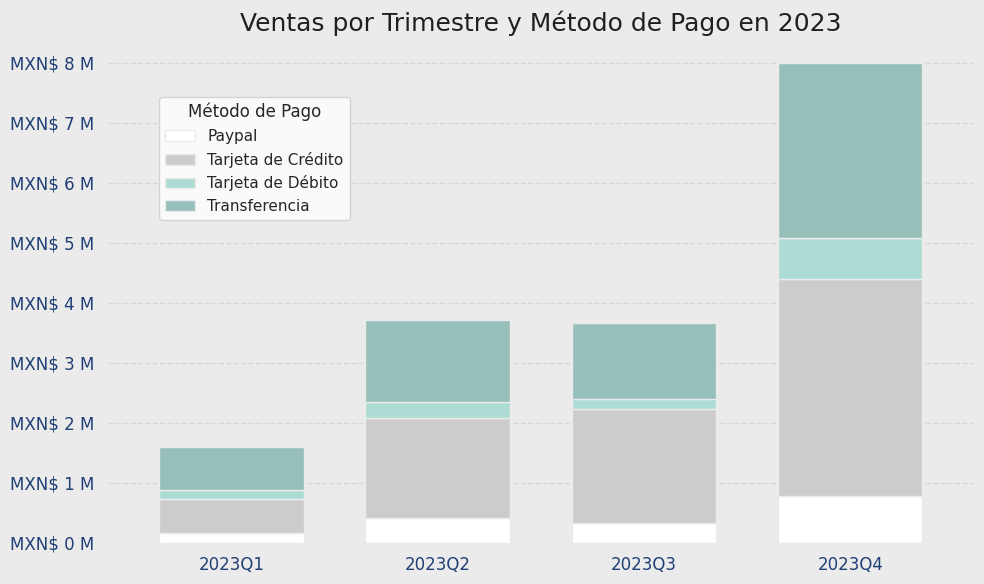

In [91]:
ventas_por_trimestre().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Ajustamos el gr√°fico de barras apiladas representando con colores m√°s suaves los valores de los m√©todos de pago. Podemos notar cosas interesantes en este gr√°fico, como: el 2¬∫ y 4¬∫ trimestre siendo los momentos en que Zoop factura m√°s con ventas, y tambi√©n el aumento en los pagos de las compras realizadas por los clientes mediante tarjeta de cr√©dito.


### **Gr√°fico 5 - Clientes participantes del programa de cashback:**

Ahora ha llegado el momento del gr√°fico de sectores. Ya est√° bien encaminado, pero necesitamos realizar algunos ajustes.


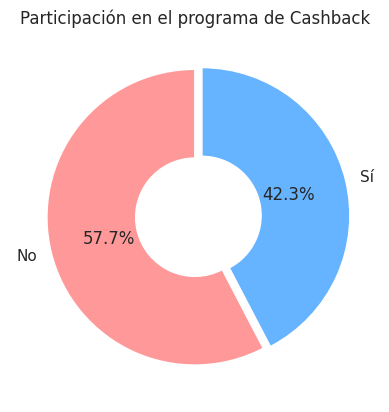

In [70]:
# Contar cu√°ntos participan y cu√°ntos no
cashback_counts = df['cashback'].value_counts()

# Crear gr√°fico de pastel
fig, ax = plt.subplots()

'''
El circulo interior tiene un radio de R - 40%R. Siendo R el radio desde el
centro hasta los bordes de las secciones
'''
ax.pie(
    cashback_counts,
    labels=cashback_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff'],  # Colores
    explode=[0.05 if label == 'S√≠' else 0 for label in cashback_counts.index],  # Resaltar "S√≠" si deseas
    wedgeprops={'width': 0.6} #Se grafica un anillo.
)

ax.set_title('Participaci√≥n en el programa de Cashback')
ax.set_aspect('equal')  # Para que el gr√°fico sea circular

plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora, vamos a refinar el gr√°fico de dona que produjimos para la proporci√≥n de usuarios que se adhieren al programa de cashback.

Recuerda que el script original del gr√°fico es el siguiente:

```python
# Contar cu√°ntos participan y cu√°ntos no
cashback_counts = df['cashback'].value_counts()

# Crear gr√°fico de pastel
fig, ax = plt.subplots()

'''
El circulo interior tiene un radio de R - 40%R. Siendo R el radio desde el
centro hasta los bordes de las secciones
'''
ax.pie(
    cashback_counts,
    labels=cashback_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff'],  # Colores
    explode=[0.05 if label == 'S√≠' else 0 for label in cashback_counts.index],  # Resaltar "S√≠" si deseas
    wedgeprops={'width': 0.6} #Se grafica un anillo.
)

ax.set_title('Participaci√≥n en el programa de Cashback')
ax.set_aspect('equal')  # Para que el gr√°fico sea circular

plt.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, el color de la porci√≥n de valor "No" igual a GRIS_3, el color de la porci√≥n de valor "S√≠" igual a AZUL_1 y el tama√±o de la figura debe ser de (6, 6).

El t√≠tulo de la figura es "¬øParticipan en el programa de cashback?" con un tama√±o de 18 y su color GRIS_5.

Las etiquetas de las porciones deben tener el mismo color que las porciones y un tama√±o de 12, y los porcentajes deben estar en color BLANCO, tambi√©n con un tama√±o de 12.

La propiedad de ancho de la dona (`wedgeprops`) debe ser de 0.4, la posici√≥n de los porcentajes dentro de la porci√≥n (`pctdistance`) debe ser de 0.8, el √°ngulo de inicio debe ser de 180 (`startangle`), y sin explosi√≥n de porciones.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [92]:
def proporcion_cashback():
  # Contar la participaci√≥n en el programa de cashback
  cashback_counts = df['cashback'].value_counts()

  # Colores seg√∫n valor
  colores = [AZUL_1 if label == 'S√≠' else GRIS_3 for label in cashback_counts.index]

  # Crear figura y ejes
  fig, ax = plt.subplots(figsize=(6, 6))
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # Crear gr√°fico de dona
  wedges, texts, autotexts = ax.pie(
      cashback_counts,
      labels=cashback_counts.index,
      colors=colores,
      autopct='%1.1f%%',
      startangle=180,
      wedgeprops={'width': 0.4},
      pctdistance=0.8
  )

  # Personalizar etiquetas y porcentajes
  for text, label in zip(texts, cashback_counts.index):
      text.set_color(AZUL_1 if label == 'S√≠' else GRIS_3)
      text.set_fontsize(12)

  for autotext in autotexts:
      autotext.set_color(BLANCO)
      autotext.set_fontsize(12)
      autotext.set_weight('bold')

  # T√≠tulo del gr√°fico
  ax.set_title('¬øParticipan en el programa de cashback?', fontsize=18, color=GRIS_5)
  ax.set_aspect('equal')  # Mantener proporci√≥n circular

  # Mostrar
  plt.tight_layout()
  return fig

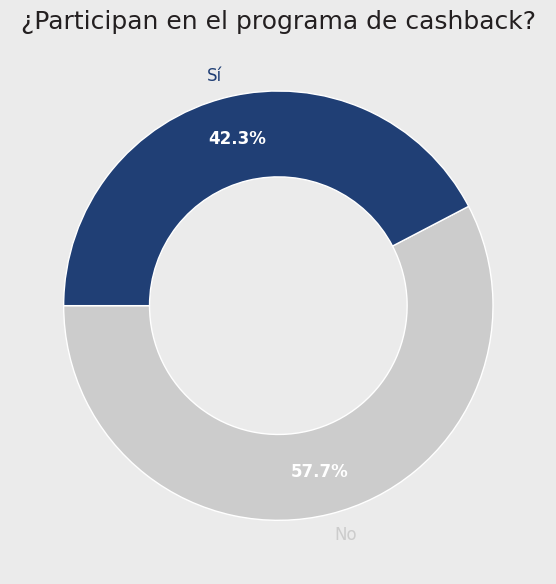

In [93]:
proporcion_cashback().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos modificado otro gr√°fico, ahora el de dona, para representar la proporci√≥n de nuestros(as) clientes. Dimos mayor destaque al "S√≠", utilizando el color como recurso de punto focal.


## **5.3 - Ajustando los visuales de distribuci√≥n**

---


Ahora vamos con los √∫ltimos 2 gr√°ficos antes de la exportaci√≥n de los visuales. Vamos a aplicar m√°s t√©cnicas de storytelling que aprendimos mediante el uso de la IA.


### **Gr√°fico 6 - Evaluaciones de los productos:**


Agora vamos para a distribui√ß√£o das avalia√ß√µes dos produtos em que criamos um histograma. Vamos adicionar mais um novo elemento visual e realizar alguns ajustes.

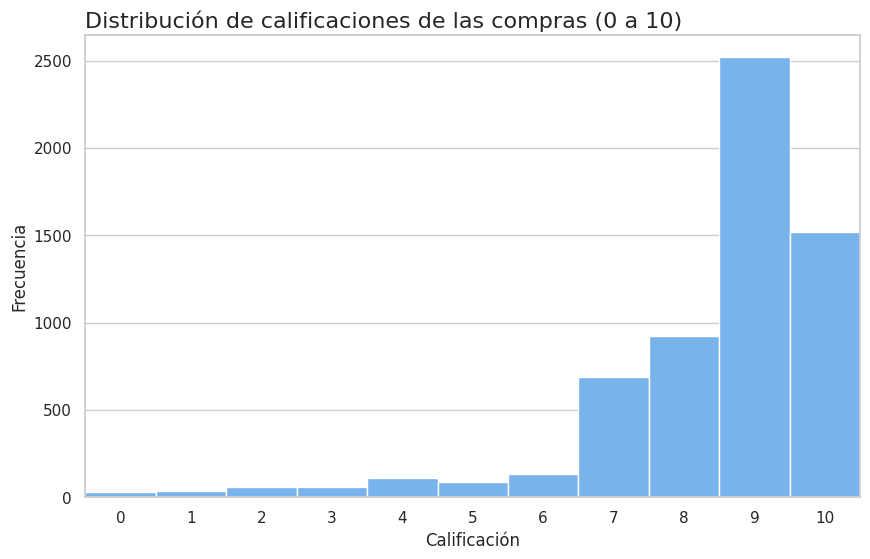

In [73]:
# Contar cu√°ntos participan y cu√°ntos no
nota_counts = df['nota'].value_counts()

# Crear figura
plt.figure(figsize=(10, 6))

# Histograma de la columna "nota"
sns.barplot(x=nota_counts.index,
            y=nota_counts.values,
            color='#66b3ff',
            width=1 #Para agrandar las barras y colocarlas juntas
            )

# Personalizar el gr√°fico
plt.title('Distribuci√≥n de calificaciones de las compras (0 a 10)', fontsize=16, loc='left')
plt.xlabel('Calificaci√≥n')
plt.ylabel('Frecuencia')

# Mostrar gr√°fico
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos con el gr√°fico de la Distribuci√≥n de las Evaluaciones de Compra que produjimos anteriormente. Vamos a refinarlo usando las siguientes orientaciones.

El script original que genera el gr√°fico es el siguiente:

```python
# Contar cu√°ntos participan y cu√°ntos no
nota_counts = df['nota'].value_counts()

# Crear figura
plt.figure(figsize=(10, 6))

# Histograma de la columna "nota"
sns.barplot(x=nota_counts.index,
            y=nota_counts.values,
            color='#66b3ff',
            width=1 #Para agrandar las barras y colocarlas juntas
            )

# Personalizar el gr√°fico
plt.title('Distribuci√≥n de calificaciones de las compras (0 a 10)', fontsize=16, loc='left')
plt.xlabel('Calificaci√≥n')
plt.ylabel('Frecuencia')

# Mostrar gr√°fico
plt.show()
```

Nuestro gr√°fico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, el color de las columnas en ROJO_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Distribuci√≥n de las evaluaciones de las compras en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben tener tama√±o 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben tener tama√±o 12 con el color AZUL_1 y las etiquetas de los ejes x e y (xlabel e ylabel) tambi√©n deben tener tama√±o 12 con el color AZUL_1. Todos los bordes del gr√°fico deben ser suprimidos (['top', 'bottom', 'left', 'right']).

El grid del eje y debe estar detr√°s del gr√°fico (`ax.set_axisbelow(True)`). El grid del eje x no debe ser visible.

Vamos a a√±adir una caja de anotaci√≥n (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del √°rea del gr√°fico. El texto de la anotaci√≥n es

```python
f"Promedio de calificaciones = {df['nota'].mean().round(2)}\n Calificaci√≥n m√°s com√∫n = {df['nota'].value_counts().idxmax()}\n Frecuencia m√°s com√∫n = {df['nota'].value_counts().max()}"
```

en color AZUL_1. A√±ade la caja de anotaci√≥n con el texto en la posici√≥n xytext=(2, 1800) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(8.7, 2250).

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [94]:
def distribucion_calificaciones():
  # Contar frecuencia de cada calificaci√≥n
  nota_counts = df['nota'].value_counts().sort_index()

  # Crear figura y ejes
  fig, ax = plt.subplots(figsize=(10, 6))
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # Crear gr√°fico de barras
  sns.barplot(x=nota_counts.index,
              y=nota_counts.values,
              color=ROJO_1,
              width=1,
              ax=ax)

  # T√≠tulo personalizado
  ax.set_title('Distribuci√≥n de las evaluaciones de las compras en 2023',
              fontsize=18,
              color=GRIS_5,
              loc='left')

  # Etiquetas y formato de ejes
  ax.set_xlabel('Calificaci√≥n', fontsize=12, color=AZUL_1)
  ax.set_ylabel('Frecuencia', fontsize=12, color=AZUL_1)
  ax.set_xticks(nota_counts.index)
  ax.set_xticklabels(nota_counts.index, fontsize=12, color=AZUL_1)
  ax.set_yticklabels(ax.get_yticks(), fontsize=12, color=AZUL_1)

  # Est√©tica: eliminar bordes
  for spine in ['top', 'bottom', 'left', 'right']:
      ax.spines[spine].set_visible(False)

  # Grilla solo en eje Y, detr√°s del gr√°fico
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, linestyle='-', linewidth=0.5)
  ax.xaxis.grid(False)

  # Anotaci√≥n
  texto_anotacion = (
      f"Promedio de calificaciones = {df['nota'].mean().round(2)}\n"
      f"Calificaci√≥n m√°s com√∫n = {df['nota'].value_counts().idxmax()}\n"
      f"Frecuencia m√°s com√∫n = {df['nota'].value_counts().max()}"
  )

  ax.annotate(texto_anotacion,
              xy=(8.7, 2250),
              xytext=(2, 1800),
              fontsize=10,
              color=AZUL_1,
              bbox=dict(boxstyle="round,pad=0.5", facecolor=BLANCO, edgecolor=GRIS_3),
              arrowprops=dict(edgecolor=AZUL_1, arrowstyle="->", connectionstyle="arc3, rad=0.3"))

  plt.tight_layout()
  return fig

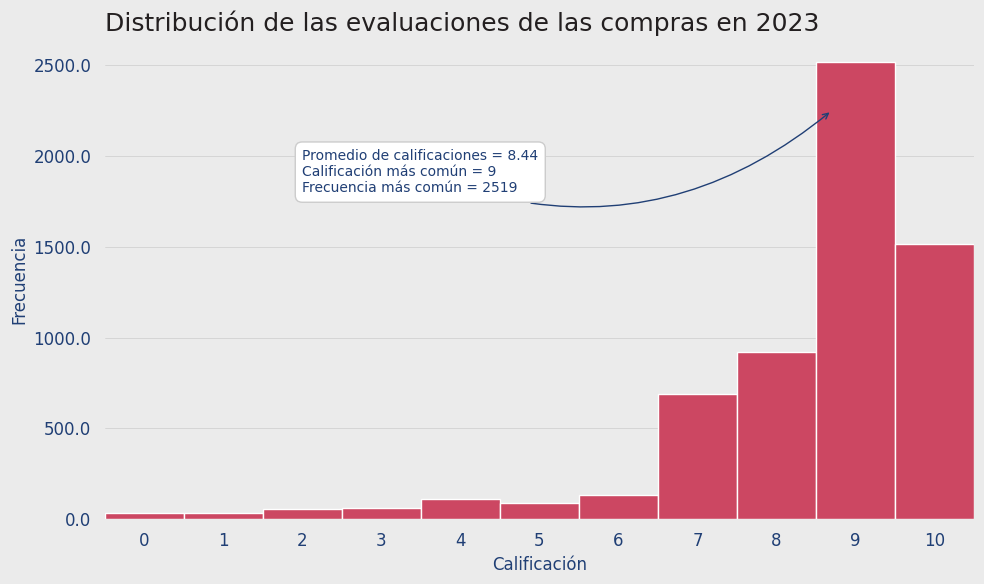

In [95]:
distribucion_calificaciones().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

¬°Una novedad m√°s en nuestro gr√°fico! A√±adimos la funci√≥n de caja de anotaciones, que es muy √∫til para proporcionar informaci√≥n sobre los datos. Con ella es posible utilizar flechas como indicadores para destacar detalles.


### **Gr√°fico 7 - Distribuci√≥n del p√∫blico por edad y sexo biol√≥gico:**


Ahora vamos con nuestra √∫ltima visualizaci√≥n.


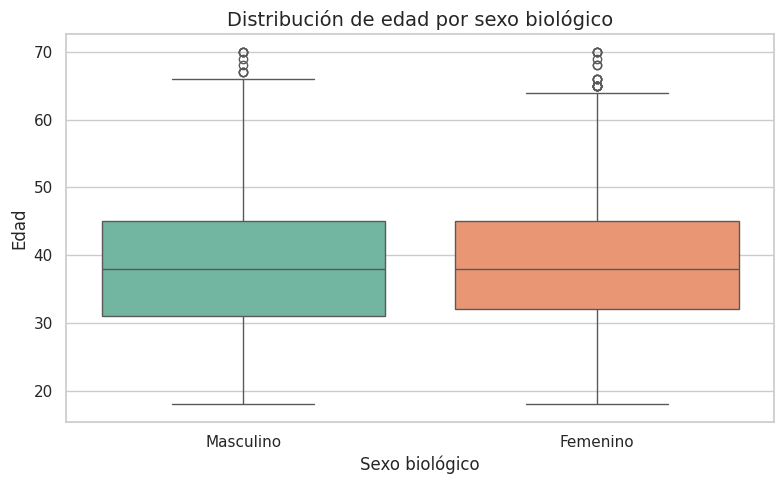

In [76]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sexo_biologico', y='edad', palette='Set2')

# Personalizar
plt.title('Distribuci√≥n de edad por sexo biol√≥gico', fontsize=14)
plt.xlabel('Sexo biol√≥gico')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos al gr√°fico de boxplot de la Distribuci√≥n de la Edad por Sexo Biol√≥gico que produjimos anteriormente. Vamos a refinado usando las siguientes orientaciones.

El script original que genera el gr√°fico es el siguiente:

```python
# Crear el gr√°fico
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sexo_biologico', y='edad', palette='Set2')

# Personalizar
plt.title('Distribuci√≥n de edad por sexo biol√≥gico', fontsize=14)
plt.xlabel('Sexo biol√≥gico')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Distribuci√≥n de la Edad por Sexo Biol√≥gico de los  clientes" con tama√±o 18 y su color GRIS_5.

La columna 'sexo_biologico' est√° representada en el eje x y la 'edad' en el eje y. La paleta de colores para los valores de x es [AZUL_1, AQUA_1].

La etiqueta del eje x (xlabel) debe ser suprimida. Los r√≥tulos del eje x y y (xticks y yticks) deben tener tama√±o 12 con el color AZUL_1 y la etiqueta del eje y (ylabel) tambi√©n debe tener tama√±o 12 con el color AZUL_1. Todos los bordes del gr√°fico deben ser suprimidos y la cuadr√≠cula del eje y debe estar detr√°s del gr√°fico (`ax.set_axisbelow(True)`).

Vamos a agregar dos cajas de anotaci√≥n (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del √°rea del gr√°fico.

El texto de la primera anotaci√≥n en color AZUL_1 es

```python
f"M√≠nimo = df.groupby("sexo_biologico")["edad"].min()[1]\n 1¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[1]\n 2¬∫ quartil = df.groupby("sexo_biologico")["edad"].median()[1]\n 3¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[1]\n M√°ximo = df.groupby("sexo_biologico")["edad"].max()[1]"
```

Agrega la caja de anotaci√≥n con el texto en la posici√≥n xytext=(-0.4, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(-0.1, 45).

El texto de la segunda anotaci√≥n en color AZUL_1 es

```python
f"M√≠nimo = df.groupby("sexo_biologico")["edad"].min()[0]\n 1¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[0]\n 2¬∫ quartil = df.groupby("sexo_biologico")["edad"].median()[0]\n 3¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[0]\n M√°ximo = df.groupby("sexo_biologico")["edad"].max()[0]"
```


Agrega la caja de anotaci√≥n con el texto en la posici√≥n xytext=(0.6, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(0.9, 45).

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [96]:
def box_plot_edad_sexo():
  # Crear figura y ejes
  fig, ax = plt.subplots(figsize=(10, 6))
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # Crear gr√°fico de boxplot con paleta personalizada
  sns.boxplot(
      data=df,
      x='sexo_biologico',
      y='edad',
      palette=[AZUL_1, AQUA_1],
      ax=ax
  )

  # T√≠tulo del gr√°fico
  ax.set_title('Distribuci√≥n de la Edad por Sexo Biol√≥gico de los clientes',
              fontsize=18,
              color=GRIS_5)

  # Configurar etiquetas de los ejes
  ax.set_xlabel('')
  ax.set_ylabel('Edad', fontsize=12, color=AZUL_1)
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, color=AZUL_1)
  ax.set_yticklabels(ax.get_yticks(), fontsize=12, color=AZUL_1)

  # Eliminar bordes del gr√°fico
  for spine in ['top', 'bottom', 'left', 'right']:
      ax.spines[spine].set_visible(False)

  # Cuadr√≠cula en eje Y
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, linestyle='--', alpha=0.3)
  ax.xaxis.grid(False)

  # Primer texto de anotaci√≥n para el √≠ndice [1]
  texto_1 = (
      f"M√≠nimo = {df.groupby('sexo_biologico')['edad'].min()[1]}\n"
      f"1¬∫ quartil = {df.groupby('sexo_biologico')['edad'].quantile(.25)[1]}\n"
      f"2¬∫ quartil = {df.groupby('sexo_biologico')['edad'].median()[1]}\n"
      f"3¬∫ quartil = {df.groupby('sexo_biologico')['edad'].quantile(.75)[1]}\n"
      f"M√°ximo = {df.groupby('sexo_biologico')['edad'].max()[1]}"
  )

  ax.annotate(
      texto_1,
      xy=(-0.1, 45),
      xytext=(-0.4, 50),
      fontsize=10,
      color=AZUL_1,
      arrowprops=dict(edgecolor=AZUL_1, arrowstyle="->", connectionstyle="arc3, rad=0.3"),
      bbox=dict(boxstyle="round,pad=0.5", facecolor=BLANCO, edgecolor=GRIS_3)
  )

  # Segundo texto de anotaci√≥n para el √≠ndice [0]
  texto_0 = (
      f"M√≠nimo = {df.groupby('sexo_biologico')['edad'].min()[0]}\n"
      f"1¬∫ quartil = {df.groupby('sexo_biologico')['edad'].quantile(.25)[0]}\n"
      f"2¬∫ quartil = {df.groupby('sexo_biologico')['edad'].median()[0]}\n"
      f"3¬∫ quartil = {df.groupby('sexo_biologico')['edad'].quantile(.75)[0]}\n"
      f"M√°ximo = {df.groupby('sexo_biologico')['edad'].max()[0]}"
  )

  ax.annotate(
      texto_0,
      xy=(0.9, 45),
      xytext=(0.6, 50),
      fontsize=10,
      color=AZUL_1,
      arrowprops=dict(edgecolor=AZUL_1, arrowstyle="->", connectionstyle="arc3, rad=0.3"),
      bbox=dict(boxstyle="round,pad=0.5", facecolor=BLANCO, edgecolor=GRIS_3)
  )

  plt.tight_layout()
  return fig

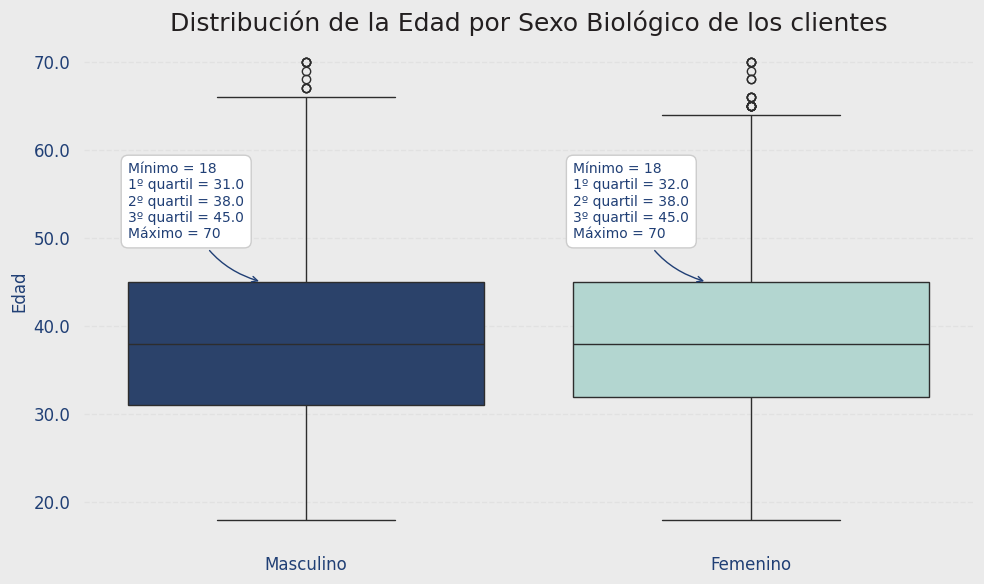

In [97]:
box_plot_edad_sexo().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Para nuestro √∫ltimo gr√°fico, creamos nuevamente el bloque de anotaciones se√±alando los valores que se muestran en un boxplot. Notamos que la distribuci√≥n entre los clientes de sexo biol√≥gico masculino y femenino es bastante cercana, con solo un a√±o de diferencia en el rango intercuartil (del 1¬∫ al 3¬∫ cuartil) en el caso del sexo biol√≥gico masculino. Zoop tiene en la mediana una clientela de 38 a√±os de edad para ambos sexos.


## **5.4 - Exportando las visualizaciones**

---



¬°Listo! Ahora que hemos finalizado los ajustes de todos los gr√°ficos solicitados, generaremos un √∫ltimo c√≥digo para exportar cada uno de los gr√°ficos que transformamos en funciones en formato de imagen (PNG).

<strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora, vamos a nuestra √∫ltima etapa: guardar las visualizaciones como imagen. Coloca cada uno de los gr√°ficos que generamos dentro de una funci√≥n y quiero que se aplique el siguiente procedimiento a cada una de ellas:

```
nombre_imagen = nombre_funcion()
nombre_imagen.savefig('nombre_imagen.png', bbox_inches='tight')
nombre_imagen.close()
```
Las funciones son:


- metodos_pago()
- ventas_mensuales()
- facturacion_por_categoria()
- ventas_por_trimestre()
- proporcion_cashback()
- distribucion_calificaciones()
- box_plot_edad_sexo()
- facturacion_por_region()
- proporcion_zooppay()

Reemplaza la variable "nombre_imagen" por "grafico_" seguido del nombre de la funci√≥n que genera el gr√°fico.

Utiliza el lenguaje Python para crear el c√≥digo y no mostrar las im√°genes.

In [104]:
# Generar una funci√≥n para guardar cada gr√°fico como imagen
def guardar_archivo(funcion, nombre_archivo):
    fig = funcion()  # Llama a la funci√≥n, que debe retornar la figura
    fig.savefig(f"grafico_{nombre_archivo}.png", bbox_inches='tight')
    plt.close()

# Guardar todas las visualizaciones como imagen
guardar_archivo(metodos_pago, 'metodos_pago')
guardar_archivo(ventas_mensuales, 'ventas_mensuales')
guardar_archivo(facturacion_por_categoria,'facturacion_por_categoria')
guardar_archivo(ventas_por_trimestre,'ventas_por_trimestre')
guardar_archivo(proporcion_cashback,'proporcion_cashback')
guardar_archivo(distribucion_calificaciones,'distribucion_calificaciones')
guardar_archivo(box_plot_edad_sexo,'box_plot_edad_sexo')
guardar_archivo(facturacion_por_region,'facturacion_por_region')
guardar_archivo(proporcion_zooppay,'proporcion_zooppay')

¬°Ahora es tu turno! ¬øQu√© tal descargar los gr√°ficos y generar un informe con algunos insights y explicando los resultados?

¬°Espero que hayas disfrutado este curso y saques el m√°ximo provecho del contenido!